In [1]:
import json
import os
import time
import ipyparallel as ipp

import matplotlib.pyplot as plt
import torch
import train_cluster_cifar_dfca_tf as DFCA
import pickle

import numpy as np

from util import *

2025-06-01 12:27:12.025668: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Instructions for updating:
non-resource variables are not supported in the long term


Reads Config file and prepares the arguments you can choose in the config_dfca.json/config_ifca.json

In [2]:
# theoretically irrelevant here because we initialize the model seed randomly (see find_good_initializer())
seeds = [11,12]
learning_rates = [0.25]

dfca_gi = []
ifca = []

Running the dfca-gi experiment

In [3]:
import json
import time
import torch
import numpy as np


with open("config.json", "r") as read_file:
    config = json.load(read_file)

for lr in learning_rates:
    config['lr'] = lr
    res_final = []

    for seed in seeds:
        print(f"---------------------------------DFCA-GI, lr: {lr}, seed: {seed}---------------------------------")
        start_time = time.time()
        config['data_seed'] = seed
        config['train_seed'] = config['data_seed']

        print("config:",config)

        exp = DFCA.TrainCIFARCluster(config)
        exp.setup()
        res = exp.run()
        res_final.append([[r['test']['loss'] for r in res], [r['test']['acc'] for r in res], [r['test']['cl_acc'] for r in res], [r['train']['loss'] for r in res]])
        del exp
        duration = (time.time() - start_time)
        print("---train cluster Ended in %0.2f hour (%.3f sec) " % (duration/float(3600), duration))

    res_mean = np.mean(res_final, axis=0).tolist()
    dfca_gi.append(res_mean)



---------------------------------DFCA-GI, lr: 0.25, seed: 11---------------------------------
config: {'m': 200, 'm_test': 40, 'p': 2, 'n': 500, 'participation_rate': 0.3, 'num_epochs': 300, 'batch_size': 50, 'tau': 5, 'lr': 0.25, 'data_seed': 11, 'train_seed': 11, 'project_dir': 'output'}


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


finding good initializer from train data


I0000 00:00:1748773636.189019 3899355 mlir_graph_optimization_pass.cc:401] MLIR V1 optimization pass is not enabled
2025-06-01 12:27:16.232179: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.676 a 0.084  clct[29, 31] ans[31, 29] cl_acc 0.633 3.796sec
found good initializer


Epoch -1 tr: l 4.677 a 0.082  clct[24, 36] ans[33, 27] cl_acc 0.650 3.492sec


Epoch -1 tst: l 4.677 a 0.081  clct[22, 18] ans[20, 20] cl_acc 0.650 2.238sec


Epoch 0 tr: l 2.023 a 0.373  clct[1, 59] ans[32, 28] lr 0.250000 cl_acc 0.550 43.715sec(train) 3.883sec(infer)


Epoch 0 tst: l 1.950 a 0.390  clct[0, 40] ans[20, 20] cl_acc 0.500 2.342sec
result written at output/results.pickle


Epoch 1 tr: l 1.956 a 0.438  clct[28, 32] ans[32, 28] lr 0.247500 cl_acc 1.000 43.426sec(train) 4.420sec(infer)


Epoch 1 tst: l 1.837 a 0.478  clct[20, 20] ans[20, 20] cl_acc 1.000 2.676sec


Epoch 2 tr: l 1.752 a 0.531  clct[28, 32] ans[32, 28] lr 0.245025 cl_acc 1.000 43.248sec(train) 4.160sec(infer)


Epoch 2 tst: l 1.633 a 0.577  clct[20, 20] ans[20, 20] cl_acc 1.000 2.705sec


Epoch 3 tr: l 1.705 a 0.567  clct[31, 29] ans[29, 31] lr 0.242575 cl_acc 1.000 43.325sec(train) 3.859sec(infer)


Epoch 3 tst: l 1.592 a 0.610  clct[20, 20] ans[20, 20] cl_acc 1.000 2.455sec


Epoch 4 tr: l 1.681 a 0.582  clct[29, 31] ans[31, 29] lr 0.240149 cl_acc 1.000 43.480sec(train) 4.188sec(infer)


Epoch 4 tst: l 1.577 a 0.619  clct[20, 20] ans[20, 20] cl_acc 1.000 2.562sec


Epoch 5 tr: l 1.787 a 0.577  clct[27, 33] ans[33, 27] lr 0.237748 cl_acc 1.000 43.134sec(train) 4.376sec(infer)


Epoch 5 tst: l 1.694 a 0.609  clct[20, 20] ans[20, 20] cl_acc 1.000 2.743sec


Epoch 6 tr: l 1.744 a 0.590  clct[33, 27] ans[27, 33] lr 0.235370 cl_acc 1.000 43.388sec(train) 4.071sec(infer)


Epoch 6 tst: l 1.696 a 0.619  clct[20, 20] ans[20, 20] cl_acc 1.000 2.371sec


Epoch 7 tr: l 1.634 a 0.619  clct[31, 29] ans[29, 31] lr 0.233016 cl_acc 1.000 43.431sec(train) 4.177sec(infer)


Epoch 7 tst: l 1.551 a 0.648  clct[20, 20] ans[20, 20] cl_acc 1.000 2.580sec


Epoch 8 tr: l 1.629 a 0.625  clct[27, 33] ans[33, 27] lr 0.230686 cl_acc 1.000 43.366sec(train) 4.035sec(infer)


Epoch 8 tst: l 1.559 a 0.650  clct[20, 20] ans[20, 20] cl_acc 1.000 2.550sec


Epoch 9 tr: l 1.615 a 0.634  clct[32, 28] ans[28, 32] lr 0.228379 cl_acc 1.000 43.399sec(train) 4.117sec(infer)


Epoch 9 tst: l 1.539 a 0.664  clct[20, 20] ans[20, 20] cl_acc 1.000 2.547sec


Epoch 10 tr: l 1.704 a 0.613  clct[30, 30] ans[30, 30] lr 0.226096 cl_acc 1.000 43.540sec(train) 3.946sec(infer)


Epoch 10 tst: l 1.595 a 0.648  clct[20, 20] ans[20, 20] cl_acc 1.000 2.405sec
result written at output/results.pickle


Epoch 11 tr: l 1.600 a 0.647  clct[31, 29] ans[29, 31] lr 0.223835 cl_acc 1.000 42.977sec(train) 3.973sec(infer)


Epoch 11 tst: l 1.506 a 0.681  clct[20, 20] ans[20, 20] cl_acc 1.000 2.504sec


Epoch 12 tr: l 1.660 a 0.633  clct[28, 32] ans[32, 28] lr 0.221596 cl_acc 1.000 43.150sec(train) 4.081sec(infer)


Epoch 12 tst: l 1.619 a 0.652  clct[20, 20] ans[20, 20] cl_acc 1.000 2.583sec


Epoch 13 tr: l 1.563 a 0.647  clct[30, 30] ans[30, 30] lr 0.219380 cl_acc 1.000 43.294sec(train) 4.396sec(infer)


Epoch 13 tst: l 1.478 a 0.682  clct[20, 20] ans[20, 20] cl_acc 1.000 2.649sec


Epoch 14 tr: l 1.538 a 0.655  clct[30, 30] ans[30, 30] lr 0.217186 cl_acc 1.000 43.202sec(train) 4.289sec(infer)


Epoch 14 tst: l 1.463 a 0.679  clct[20, 20] ans[20, 20] cl_acc 1.000 2.814sec


Epoch 15 tr: l 1.567 a 0.646  clct[30, 30] ans[30, 30] lr 0.215015 cl_acc 1.000 43.318sec(train) 4.144sec(infer)


Epoch 15 tst: l 1.502 a 0.671  clct[20, 20] ans[20, 20] cl_acc 1.000 2.550sec


Epoch 16 tr: l 1.583 a 0.653  clct[29, 31] ans[31, 29] lr 0.212864 cl_acc 1.000 43.141sec(train) 3.910sec(infer)


Epoch 16 tst: l 1.508 a 0.679  clct[20, 20] ans[20, 20] cl_acc 1.000 2.695sec


Epoch 17 tr: l 1.525 a 0.666  clct[25, 35] ans[35, 25] lr 0.210736 cl_acc 1.000 43.243sec(train) 4.251sec(infer)


Epoch 17 tst: l 1.469 a 0.689  clct[20, 20] ans[20, 20] cl_acc 1.000 2.575sec


Epoch 18 tr: l 1.529 a 0.664  clct[29, 31] ans[31, 29] lr 0.208628 cl_acc 1.000 43.176sec(train) 4.001sec(infer)


Epoch 18 tst: l 1.479 a 0.688  clct[20, 20] ans[20, 20] cl_acc 1.000 2.503sec


Epoch 19 tr: l 1.578 a 0.653  clct[26, 34] ans[34, 26] lr 0.206542 cl_acc 1.000 43.201sec(train) 4.206sec(infer)


Epoch 19 tst: l 1.550 a 0.666  clct[20, 20] ans[20, 20] cl_acc 1.000 2.865sec


Epoch 20 tr: l 1.525 a 0.662  clct[40, 20] ans[20, 40] lr 0.204477 cl_acc 1.000 43.123sec(train) 3.879sec(infer)


Epoch 20 tst: l 1.453 a 0.686  clct[20, 20] ans[20, 20] cl_acc 1.000 2.645sec
result written at output/results.pickle


Epoch 21 tr: l 1.497 a 0.668  clct[34, 26] ans[26, 34] lr 0.202432 cl_acc 1.000 43.218sec(train) 4.161sec(infer)


Epoch 21 tst: l 1.401 a 0.702  clct[20, 20] ans[20, 20] cl_acc 1.000 2.519sec


Epoch 22 tr: l 1.447 a 0.686  clct[33, 27] ans[27, 33] lr 0.200408 cl_acc 1.000 43.247sec(train) 4.384sec(infer)


Epoch 22 tst: l 1.367 a 0.715  clct[20, 20] ans[20, 20] cl_acc 1.000 2.758sec


Epoch 23 tr: l 1.400 a 0.696  clct[33, 27] ans[27, 33] lr 0.198404 cl_acc 1.000 43.118sec(train) 4.070sec(infer)


Epoch 23 tst: l 1.356 a 0.713  clct[20, 20] ans[20, 20] cl_acc 1.000 2.577sec


Epoch 24 tr: l 1.409 a 0.696  clct[27, 33] ans[33, 27] lr 0.196420 cl_acc 1.000 43.424sec(train) 4.124sec(infer)


Epoch 24 tst: l 1.382 a 0.713  clct[20, 20] ans[20, 20] cl_acc 1.000 2.485sec


Epoch 25 tr: l 1.428 a 0.678  clct[34, 26] ans[26, 34] lr 0.194455 cl_acc 1.000 43.131sec(train) 4.251sec(infer)


Epoch 25 tst: l 1.379 a 0.699  clct[20, 20] ans[20, 20] cl_acc 1.000 2.540sec


Epoch 26 tr: l 1.439 a 0.685  clct[33, 27] ans[27, 33] lr 0.192511 cl_acc 1.000 43.317sec(train) 4.410sec(infer)


Epoch 26 tst: l 1.357 a 0.716  clct[20, 20] ans[20, 20] cl_acc 1.000 2.640sec


Epoch 27 tr: l 1.479 a 0.679  clct[32, 28] ans[28, 32] lr 0.190586 cl_acc 1.000 43.071sec(train) 4.248sec(infer)


Epoch 27 tst: l 1.431 a 0.696  clct[20, 20] ans[20, 20] cl_acc 1.000 2.562sec


Epoch 28 tr: l 1.450 a 0.684  clct[30, 30] ans[30, 30] lr 0.188680 cl_acc 1.000 43.052sec(train) 4.043sec(infer)


Epoch 28 tst: l 1.416 a 0.700  clct[20, 20] ans[20, 20] cl_acc 1.000 2.500sec


Epoch 29 tr: l 1.409 a 0.684  clct[30, 30] ans[30, 30] lr 0.186793 cl_acc 1.000 43.290sec(train) 4.063sec(infer)


Epoch 29 tst: l 1.339 a 0.711  clct[20, 20] ans[20, 20] cl_acc 1.000 2.433sec


Epoch 30 tr: l 1.519 a 0.675  clct[31, 29] ans[29, 31] lr 0.184925 cl_acc 1.000 43.209sec(train) 3.964sec(infer)


Epoch 30 tst: l 1.487 a 0.693  clct[20, 20] ans[20, 20] cl_acc 1.000 2.549sec
result written at output/results.pickle


Epoch 31 tr: l 1.398 a 0.705  clct[32, 28] ans[28, 32] lr 0.183076 cl_acc 1.000 43.219sec(train) 3.922sec(infer)


Epoch 31 tst: l 1.336 a 0.719  clct[20, 20] ans[20, 20] cl_acc 1.000 2.573sec


Epoch 32 tr: l 1.404 a 0.693  clct[27, 33] ans[33, 27] lr 0.181245 cl_acc 1.000 43.344sec(train) 3.947sec(infer)


Epoch 32 tst: l 1.353 a 0.713  clct[20, 20] ans[20, 20] cl_acc 1.000 2.433sec


Epoch 33 tr: l 1.451 a 0.690  clct[31, 29] ans[29, 31] lr 0.179433 cl_acc 1.000 43.181sec(train) 4.086sec(infer)


Epoch 33 tst: l 1.411 a 0.704  clct[20, 20] ans[20, 20] cl_acc 1.000 2.585sec


Epoch 34 tr: l 1.439 a 0.682  clct[29, 31] ans[31, 29] lr 0.177638 cl_acc 1.000 43.189sec(train) 3.663sec(infer)


Epoch 34 tst: l 1.386 a 0.705  clct[20, 20] ans[20, 20] cl_acc 1.000 2.270sec


Epoch 35 tr: l 1.343 a 0.710  clct[27, 33] ans[33, 27] lr 0.175862 cl_acc 1.000 43.327sec(train) 4.187sec(infer)


Epoch 35 tst: l 1.318 a 0.726  clct[20, 20] ans[20, 20] cl_acc 1.000 2.591sec


Epoch 36 tr: l 1.350 a 0.707  clct[30, 30] ans[30, 30] lr 0.174103 cl_acc 1.000 43.359sec(train) 4.114sec(infer)


Epoch 36 tst: l 1.304 a 0.727  clct[20, 20] ans[20, 20] cl_acc 1.000 2.533sec


Epoch 37 tr: l 1.357 a 0.706  clct[32, 28] ans[28, 32] lr 0.172362 cl_acc 1.000 43.070sec(train) 4.473sec(infer)


Epoch 37 tst: l 1.306 a 0.726  clct[20, 20] ans[20, 20] cl_acc 1.000 2.706sec


Epoch 38 tr: l 1.421 a 0.692  clct[27, 33] ans[33, 27] lr 0.170639 cl_acc 1.000 43.100sec(train) 4.398sec(infer)


Epoch 38 tst: l 1.387 a 0.714  clct[20, 20] ans[20, 20] cl_acc 1.000 2.702sec


Epoch 39 tr: l 1.280 a 0.720  clct[27, 33] ans[33, 27] lr 0.168932 cl_acc 1.000 43.350sec(train) 4.289sec(infer)


Epoch 39 tst: l 1.286 a 0.722  clct[20, 20] ans[20, 20] cl_acc 1.000 2.731sec


Epoch 40 tr: l 1.278 a 0.729  clct[22, 38] ans[38, 22] lr 0.167243 cl_acc 1.000 43.523sec(train) 4.083sec(infer)


Epoch 40 tst: l 1.269 a 0.737  clct[20, 20] ans[20, 20] cl_acc 1.000 2.569sec
result written at output/results.pickle


Epoch 41 tr: l 1.310 a 0.717  clct[27, 33] ans[33, 27] lr 0.165571 cl_acc 1.000 43.529sec(train) 4.182sec(infer)


Epoch 41 tst: l 1.310 a 0.722  clct[20, 20] ans[20, 20] cl_acc 1.000 2.729sec


Epoch 42 tr: l 1.341 a 0.710  clct[29, 31] ans[31, 29] lr 0.163915 cl_acc 1.000 43.386sec(train) 4.280sec(infer)


Epoch 42 tst: l 1.306 a 0.726  clct[20, 20] ans[20, 20] cl_acc 1.000 2.585sec


Epoch 43 tr: l 1.334 a 0.715  clct[24, 36] ans[36, 24] lr 0.162276 cl_acc 1.000 43.289sec(train) 4.342sec(infer)


Epoch 43 tst: l 1.306 a 0.733  clct[20, 20] ans[20, 20] cl_acc 1.000 2.672sec


Epoch 44 tr: l 1.283 a 0.724  clct[24, 36] ans[36, 24] lr 0.160653 cl_acc 1.000 43.447sec(train) 4.174sec(infer)


Epoch 44 tst: l 1.281 a 0.734  clct[20, 20] ans[20, 20] cl_acc 1.000 2.680sec


Epoch 45 tr: l 1.359 a 0.702  clct[30, 30] ans[30, 30] lr 0.159046 cl_acc 1.000 43.241sec(train) 4.147sec(infer)


Epoch 45 tst: l 1.286 a 0.733  clct[20, 20] ans[20, 20] cl_acc 1.000 2.518sec


Epoch 46 tr: l 1.358 a 0.699  clct[30, 30] ans[30, 30] lr 0.157456 cl_acc 1.000 43.257sec(train) 4.322sec(infer)


Epoch 46 tst: l 1.359 a 0.713  clct[20, 20] ans[20, 20] cl_acc 1.000 2.788sec


Epoch 47 tr: l 1.316 a 0.706  clct[32, 28] ans[28, 32] lr 0.155881 cl_acc 1.000 43.460sec(train) 3.963sec(infer)


Epoch 47 tst: l 1.295 a 0.721  clct[20, 20] ans[20, 20] cl_acc 1.000 2.405sec


Epoch 48 tr: l 1.299 a 0.717  clct[31, 29] ans[29, 31] lr 0.154323 cl_acc 1.000 43.455sec(train) 3.997sec(infer)


Epoch 48 tst: l 1.250 a 0.737  clct[20, 20] ans[20, 20] cl_acc 1.000 2.541sec


Epoch 49 tr: l 1.297 a 0.715  clct[23, 37] ans[37, 23] lr 0.152779 cl_acc 1.000 43.524sec(train) 3.792sec(infer)


Epoch 49 tst: l 1.296 a 0.722  clct[20, 20] ans[20, 20] cl_acc 1.000 2.321sec


Epoch 50 tr: l 1.305 a 0.707  clct[27, 33] ans[33, 27] lr 0.151252 cl_acc 1.000 43.450sec(train) 4.187sec(infer)


Epoch 50 tst: l 1.291 a 0.720  clct[20, 20] ans[20, 20] cl_acc 1.000 2.725sec
result written at output/results.pickle


Epoch 51 tr: l 1.260 a 0.721  clct[30, 30] ans[30, 30] lr 0.149739 cl_acc 1.000 43.552sec(train) 4.332sec(infer)


Epoch 51 tst: l 1.215 a 0.741  clct[20, 20] ans[20, 20] cl_acc 1.000 2.815sec


Epoch 52 tr: l 1.261 a 0.719  clct[30, 30] ans[30, 30] lr 0.148242 cl_acc 1.000 43.559sec(train) 4.297sec(infer)


Epoch 52 tst: l 1.235 a 0.734  clct[20, 20] ans[20, 20] cl_acc 1.000 2.883sec


Epoch 53 tr: l 1.214 a 0.732  clct[35, 25] ans[25, 35] lr 0.146759 cl_acc 1.000 43.705sec(train) 4.309sec(infer)


Epoch 53 tst: l 1.204 a 0.746  clct[20, 20] ans[20, 20] cl_acc 1.000 2.758sec


Epoch 54 tr: l 1.185 a 0.746  clct[31, 29] ans[29, 31] lr 0.145292 cl_acc 1.000 43.572sec(train) 4.409sec(infer)


Epoch 54 tst: l 1.195 a 0.748  clct[20, 20] ans[20, 20] cl_acc 1.000 2.795sec


Epoch 55 tr: l 1.254 a 0.722  clct[24, 36] ans[36, 24] lr 0.143839 cl_acc 1.000 43.759sec(train) 4.236sec(infer)


Epoch 55 tst: l 1.248 a 0.732  clct[20, 20] ans[20, 20] cl_acc 1.000 2.596sec


Epoch 56 tr: l 1.252 a 0.725  clct[26, 34] ans[34, 26] lr 0.142400 cl_acc 1.000 43.503sec(train) 3.990sec(infer)


Epoch 56 tst: l 1.223 a 0.740  clct[20, 20] ans[20, 20] cl_acc 1.000 2.435sec


Epoch 57 tr: l 1.180 a 0.740  clct[27, 33] ans[33, 27] lr 0.140976 cl_acc 1.000 43.190sec(train) 4.212sec(infer)


Epoch 57 tst: l 1.163 a 0.751  clct[20, 20] ans[20, 20] cl_acc 1.000 2.767sec


Epoch 58 tr: l 1.202 a 0.738  clct[27, 33] ans[33, 27] lr 0.139567 cl_acc 1.000 43.477sec(train) 4.243sec(infer)


Epoch 58 tst: l 1.188 a 0.747  clct[20, 20] ans[20, 20] cl_acc 1.000 2.641sec


Epoch 59 tr: l 1.196 a 0.737  clct[29, 31] ans[31, 29] lr 0.138171 cl_acc 1.000 43.262sec(train) 4.288sec(infer)


Epoch 59 tst: l 1.171 a 0.748  clct[20, 20] ans[20, 20] cl_acc 1.000 2.736sec


Epoch 60 tr: l 1.207 a 0.731  clct[29, 31] ans[31, 29] lr 0.136789 cl_acc 1.000 43.251sec(train) 4.344sec(infer)


Epoch 60 tst: l 1.189 a 0.745  clct[20, 20] ans[20, 20] cl_acc 1.000 2.655sec
result written at output/results.pickle


Epoch 61 tr: l 1.127 a 0.758  clct[26, 34] ans[34, 26] lr 0.135421 cl_acc 1.000 43.201sec(train) 4.400sec(infer)


Epoch 61 tst: l 1.163 a 0.753  clct[20, 20] ans[20, 20] cl_acc 1.000 2.740sec


Epoch 62 tr: l 1.218 a 0.735  clct[25, 35] ans[35, 25] lr 0.134067 cl_acc 1.000 43.510sec(train) 4.483sec(infer)


Epoch 62 tst: l 1.173 a 0.752  clct[20, 20] ans[20, 20] cl_acc 1.000 2.772sec


Epoch 63 tr: l 1.139 a 0.747  clct[28, 32] ans[32, 28] lr 0.132726 cl_acc 1.000 43.267sec(train) 4.388sec(infer)


Epoch 63 tst: l 1.142 a 0.757  clct[20, 20] ans[20, 20] cl_acc 1.000 2.671sec


Epoch 64 tr: l 1.283 a 0.724  clct[32, 28] ans[28, 32] lr 0.131399 cl_acc 1.000 43.206sec(train) 4.398sec(infer)


Epoch 64 tst: l 1.288 a 0.734  clct[20, 20] ans[20, 20] cl_acc 1.000 2.737sec


Epoch 65 tr: l 1.114 a 0.754  clct[28, 32] ans[32, 28] lr 0.130085 cl_acc 1.000 43.295sec(train) 4.259sec(infer)


Epoch 65 tst: l 1.107 a 0.762  clct[20, 20] ans[20, 20] cl_acc 1.000 2.753sec


Epoch 66 tr: l 1.124 a 0.752  clct[33, 27] ans[27, 33] lr 0.128784 cl_acc 1.000 43.363sec(train) 4.271sec(infer)


Epoch 66 tst: l 1.162 a 0.748  clct[20, 20] ans[20, 20] cl_acc 1.000 2.751sec


Epoch 67 tr: l 1.180 a 0.739  clct[24, 36] ans[36, 24] lr 0.127496 cl_acc 1.000 43.472sec(train) 4.171sec(infer)


Epoch 67 tst: l 1.156 a 0.752  clct[20, 20] ans[20, 20] cl_acc 1.000 2.810sec


Epoch 68 tr: l 1.181 a 0.726  clct[29, 31] ans[31, 29] lr 0.126221 cl_acc 1.000 43.318sec(train) 4.504sec(infer)


Epoch 68 tst: l 1.161 a 0.740  clct[20, 20] ans[20, 20] cl_acc 1.000 2.792sec


Epoch 69 tr: l 1.114 a 0.750  clct[38, 22] ans[22, 38] lr 0.124959 cl_acc 1.000 43.167sec(train) 4.369sec(infer)


Epoch 69 tst: l 1.123 a 0.754  clct[20, 20] ans[20, 20] cl_acc 1.000 2.661sec


Epoch 70 tr: l 1.141 a 0.746  clct[35, 25] ans[25, 35] lr 0.123710 cl_acc 1.000 43.096sec(train) 4.485sec(infer)


Epoch 70 tst: l 1.139 a 0.756  clct[20, 20] ans[20, 20] cl_acc 1.000 2.759sec
result written at output/results.pickle


Epoch 71 tr: l 1.147 a 0.736  clct[28, 32] ans[32, 28] lr 0.122473 cl_acc 1.000 43.523sec(train) 4.108sec(infer)


Epoch 71 tst: l 1.125 a 0.755  clct[20, 20] ans[20, 20] cl_acc 1.000 2.647sec


Epoch 72 tr: l 1.114 a 0.747  clct[34, 26] ans[26, 34] lr 0.121248 cl_acc 1.000 43.211sec(train) 4.297sec(infer)


Epoch 72 tst: l 1.113 a 0.758  clct[20, 20] ans[20, 20] cl_acc 1.000 2.821sec


Epoch 73 tr: l 1.134 a 0.744  clct[32, 28] ans[28, 32] lr 0.120035 cl_acc 1.000 43.344sec(train) 4.272sec(infer)


Epoch 73 tst: l 1.135 a 0.748  clct[20, 20] ans[20, 20] cl_acc 1.000 2.732sec


Epoch 74 tr: l 1.109 a 0.748  clct[26, 34] ans[34, 26] lr 0.118835 cl_acc 1.000 43.219sec(train) 4.272sec(infer)


Epoch 74 tst: l 1.123 a 0.749  clct[20, 20] ans[20, 20] cl_acc 1.000 2.702sec


Epoch 75 tr: l 1.105 a 0.753  clct[35, 25] ans[25, 35] lr 0.117647 cl_acc 1.000 43.259sec(train) 4.394sec(infer)


Epoch 75 tst: l 1.100 a 0.761  clct[20, 20] ans[20, 20] cl_acc 1.000 2.679sec


Epoch 76 tr: l 1.164 a 0.740  clct[26, 34] ans[34, 26] lr 0.116470 cl_acc 1.000 43.268sec(train) 4.347sec(infer)


Epoch 76 tst: l 1.152 a 0.755  clct[20, 20] ans[20, 20] cl_acc 1.000 2.515sec


Epoch 77 tr: l 1.085 a 0.764  clct[31, 29] ans[29, 31] lr 0.115305 cl_acc 1.000 43.209sec(train) 4.310sec(infer)


Epoch 77 tst: l 1.106 a 0.764  clct[20, 20] ans[20, 20] cl_acc 1.000 2.712sec


Epoch 78 tr: l 1.080 a 0.759  clct[28, 32] ans[32, 28] lr 0.114152 cl_acc 1.000 43.320sec(train) 4.431sec(infer)


Epoch 78 tst: l 1.084 a 0.765  clct[20, 20] ans[20, 20] cl_acc 1.000 2.930sec


Epoch 79 tr: l 1.064 a 0.759  clct[30, 30] ans[30, 30] lr 0.113011 cl_acc 1.000 43.272sec(train) 4.480sec(infer)


Epoch 79 tst: l 1.064 a 0.767  clct[20, 20] ans[20, 20] cl_acc 1.000 2.798sec


Epoch 80 tr: l 1.054 a 0.766  clct[35, 25] ans[25, 35] lr 0.111881 cl_acc 1.000 43.187sec(train) 4.510sec(infer)


Epoch 80 tst: l 1.071 a 0.767  clct[20, 20] ans[20, 20] cl_acc 1.000 2.747sec
result written at output/results.pickle


Epoch 81 tr: l 1.058 a 0.760  clct[32, 28] ans[28, 32] lr 0.110762 cl_acc 1.000 43.152sec(train) 4.560sec(infer)


Epoch 81 tst: l 1.082 a 0.764  clct[20, 20] ans[20, 20] cl_acc 1.000 2.813sec


Epoch 82 tr: l 1.094 a 0.753  clct[27, 33] ans[33, 27] lr 0.109654 cl_acc 1.000 43.472sec(train) 4.375sec(infer)


Epoch 82 tst: l 1.098 a 0.759  clct[20, 20] ans[20, 20] cl_acc 1.000 2.670sec


Epoch 83 tr: l 1.064 a 0.763  clct[28, 32] ans[32, 28] lr 0.108558 cl_acc 1.000 43.378sec(train) 4.488sec(infer)


Epoch 83 tst: l 1.094 a 0.763  clct[20, 20] ans[20, 20] cl_acc 1.000 2.874sec


Epoch 84 tr: l 1.074 a 0.755  clct[28, 32] ans[32, 28] lr 0.107472 cl_acc 1.000 43.574sec(train) 4.524sec(infer)


Epoch 84 tst: l 1.061 a 0.765  clct[20, 20] ans[20, 20] cl_acc 1.000 2.914sec


Epoch 85 tr: l 1.039 a 0.769  clct[27, 33] ans[33, 27] lr 0.106398 cl_acc 1.000 43.520sec(train) 4.531sec(infer)


Epoch 85 tst: l 1.061 a 0.773  clct[20, 20] ans[20, 20] cl_acc 1.000 2.917sec


Epoch 86 tr: l 1.015 a 0.772  clct[29, 31] ans[31, 29] lr 0.105334 cl_acc 1.000 43.451sec(train) 4.517sec(infer)


Epoch 86 tst: l 1.056 a 0.766  clct[20, 20] ans[20, 20] cl_acc 1.000 2.798sec


Epoch 87 tr: l 1.051 a 0.761  clct[32, 28] ans[28, 32] lr 0.104280 cl_acc 1.000 43.332sec(train) 4.549sec(infer)


Epoch 87 tst: l 1.049 a 0.767  clct[20, 20] ans[20, 20] cl_acc 1.000 2.851sec


Epoch 88 tr: l 1.041 a 0.763  clct[30, 30] ans[30, 30] lr 0.103237 cl_acc 1.000 43.398sec(train) 4.265sec(infer)


Epoch 88 tst: l 1.036 a 0.772  clct[20, 20] ans[20, 20] cl_acc 1.000 2.782sec


Epoch 89 tr: l 1.058 a 0.764  clct[27, 33] ans[33, 27] lr 0.102205 cl_acc 1.000 43.223sec(train) 4.593sec(infer)


Epoch 89 tst: l 1.086 a 0.764  clct[20, 20] ans[20, 20] cl_acc 1.000 2.879sec


Epoch 90 tr: l 1.008 a 0.768  clct[32, 28] ans[28, 32] lr 0.101183 cl_acc 1.000 43.633sec(train) 4.535sec(infer)


Epoch 90 tst: l 1.021 a 0.768  clct[20, 20] ans[20, 20] cl_acc 1.000 2.918sec
result written at output/results.pickle


Epoch 91 tr: l 1.032 a 0.765  clct[26, 34] ans[34, 26] lr 0.100171 cl_acc 1.000 43.488sec(train) 4.232sec(infer)


Epoch 91 tst: l 1.044 a 0.767  clct[20, 20] ans[20, 20] cl_acc 1.000 2.777sec


Epoch 92 tr: l 1.035 a 0.764  clct[30, 30] ans[30, 30] lr 0.099169 cl_acc 1.000 43.602sec(train) 4.568sec(infer)


Epoch 92 tst: l 1.044 a 0.768  clct[20, 20] ans[20, 20] cl_acc 1.000 2.887sec


Epoch 93 tr: l 1.040 a 0.762  clct[27, 33] ans[33, 27] lr 0.098178 cl_acc 1.000 43.370sec(train) 4.339sec(infer)


Epoch 93 tst: l 1.068 a 0.762  clct[20, 20] ans[20, 20] cl_acc 1.000 2.752sec


Epoch 94 tr: l 1.020 a 0.769  clct[35, 25] ans[25, 35] lr 0.097196 cl_acc 1.000 43.502sec(train) 4.574sec(infer)


Epoch 94 tst: l 1.049 a 0.766  clct[20, 20] ans[20, 20] cl_acc 1.000 2.729sec


Epoch 95 tr: l 1.048 a 0.767  clct[36, 24] ans[24, 36] lr 0.096224 cl_acc 1.000 43.521sec(train) 4.219sec(infer)


Epoch 95 tst: l 1.080 a 0.766  clct[20, 20] ans[20, 20] cl_acc 1.000 2.621sec


Epoch 96 tr: l 0.996 a 0.780  clct[25, 35] ans[35, 25] lr 0.095262 cl_acc 1.000 43.505sec(train) 4.006sec(infer)


Epoch 96 tst: l 1.000 a 0.780  clct[20, 20] ans[20, 20] cl_acc 1.000 2.371sec


Epoch 97 tr: l 1.000 a 0.773  clct[35, 25] ans[25, 35] lr 0.094309 cl_acc 1.000 43.512sec(train) 4.385sec(infer)


Epoch 97 tst: l 1.018 a 0.776  clct[20, 20] ans[20, 20] cl_acc 1.000 2.749sec


Epoch 98 tr: l 1.008 a 0.774  clct[29, 31] ans[31, 29] lr 0.093366 cl_acc 1.000 43.530sec(train) 4.592sec(infer)


Epoch 98 tst: l 1.040 a 0.772  clct[20, 20] ans[20, 20] cl_acc 1.000 2.837sec


Epoch 99 tr: l 0.941 a 0.782  clct[27, 33] ans[33, 27] lr 0.092432 cl_acc 1.000 43.257sec(train) 4.224sec(infer)


Epoch 99 tst: l 0.998 a 0.773  clct[20, 20] ans[20, 20] cl_acc 1.000 2.672sec


Epoch 100 tr: l 0.989 a 0.776  clct[27, 33] ans[33, 27] lr 0.091508 cl_acc 1.000 43.325sec(train) 3.791sec(infer)


Epoch 100 tst: l 1.000 a 0.778  clct[20, 20] ans[20, 20] cl_acc 1.000 2.385sec
result written at output/results.pickle


Epoch 101 tr: l 1.016 a 0.765  clct[24, 36] ans[36, 24] lr 0.090593 cl_acc 1.000 43.386sec(train) 3.970sec(infer)


Epoch 101 tst: l 1.020 a 0.772  clct[20, 20] ans[20, 20] cl_acc 1.000 2.595sec


Epoch 102 tr: l 1.037 a 0.764  clct[30, 30] ans[30, 30] lr 0.089687 cl_acc 1.000 43.440sec(train) 4.310sec(infer)


Epoch 102 tst: l 1.073 a 0.761  clct[20, 20] ans[20, 20] cl_acc 1.000 2.737sec


Epoch 103 tr: l 0.973 a 0.769  clct[29, 31] ans[31, 29] lr 0.088790 cl_acc 1.000 43.322sec(train) 4.493sec(infer)


Epoch 103 tst: l 1.004 a 0.769  clct[20, 20] ans[20, 20] cl_acc 1.000 2.859sec


Epoch 104 tr: l 0.971 a 0.782  clct[34, 26] ans[26, 34] lr 0.087902 cl_acc 1.000 43.272sec(train) 4.351sec(infer)


Epoch 104 tst: l 0.998 a 0.783  clct[20, 20] ans[20, 20] cl_acc 1.000 2.810sec


Epoch 105 tr: l 0.970 a 0.784  clct[26, 34] ans[34, 26] lr 0.087023 cl_acc 1.000 43.336sec(train) 4.559sec(infer)


Epoch 105 tst: l 1.016 a 0.776  clct[20, 20] ans[20, 20] cl_acc 1.000 2.916sec


Epoch 106 tr: l 0.950 a 0.785  clct[28, 32] ans[32, 28] lr 0.086153 cl_acc 1.000 43.521sec(train) 4.464sec(infer)


Epoch 106 tst: l 0.989 a 0.776  clct[20, 20] ans[20, 20] cl_acc 1.000 2.767sec


Epoch 107 tr: l 0.988 a 0.775  clct[35, 25] ans[25, 35] lr 0.085292 cl_acc 1.000 43.476sec(train) 4.520sec(infer)


Epoch 107 tst: l 1.013 a 0.775  clct[20, 20] ans[20, 20] cl_acc 1.000 2.818sec


Epoch 108 tr: l 0.917 a 0.791  clct[31, 29] ans[29, 31] lr 0.084439 cl_acc 1.000 43.580sec(train) 4.691sec(infer)


Epoch 108 tst: l 0.960 a 0.783  clct[20, 20] ans[20, 20] cl_acc 1.000 2.953sec


Epoch 109 tr: l 0.969 a 0.774  clct[33, 27] ans[27, 33] lr 0.083594 cl_acc 1.000 43.698sec(train) 4.517sec(infer)


Epoch 109 tst: l 0.994 a 0.775  clct[20, 20] ans[20, 20] cl_acc 1.000 2.794sec


Epoch 110 tr: l 0.945 a 0.784  clct[28, 32] ans[32, 28] lr 0.082758 cl_acc 1.000 43.556sec(train) 4.456sec(infer)


Epoch 110 tst: l 1.003 a 0.778  clct[20, 20] ans[20, 20] cl_acc 1.000 2.832sec
result written at output/results.pickle


Epoch 111 tr: l 0.968 a 0.778  clct[27, 33] ans[33, 27] lr 0.081931 cl_acc 1.000 43.570sec(train) 4.423sec(infer)


Epoch 111 tst: l 1.003 a 0.779  clct[20, 20] ans[20, 20] cl_acc 1.000 2.846sec


Epoch 112 tr: l 0.934 a 0.788  clct[32, 28] ans[28, 32] lr 0.081111 cl_acc 1.000 43.493sec(train) 4.500sec(infer)


Epoch 112 tst: l 0.976 a 0.783  clct[20, 20] ans[20, 20] cl_acc 1.000 2.814sec


Epoch 113 tr: l 0.958 a 0.774  clct[34, 26] ans[26, 34] lr 0.080300 cl_acc 1.000 43.627sec(train) 4.332sec(infer)


Epoch 113 tst: l 0.972 a 0.775  clct[20, 20] ans[20, 20] cl_acc 1.000 2.590sec


Epoch 114 tr: l 0.863 a 0.800  clct[34, 26] ans[26, 34] lr 0.079497 cl_acc 1.000 43.712sec(train) 4.087sec(infer)


Epoch 114 tst: l 0.924 a 0.790  clct[20, 20] ans[20, 20] cl_acc 1.000 2.532sec


Epoch 115 tr: l 0.915 a 0.788  clct[25, 35] ans[35, 25] lr 0.078702 cl_acc 1.000 43.672sec(train) 4.134sec(infer)


Epoch 115 tst: l 0.954 a 0.781  clct[20, 20] ans[20, 20] cl_acc 1.000 2.480sec


Epoch 116 tr: l 0.901 a 0.793  clct[38, 22] ans[22, 38] lr 0.077915 cl_acc 1.000 43.180sec(train) 3.888sec(infer)


Epoch 116 tst: l 0.931 a 0.791  clct[20, 20] ans[20, 20] cl_acc 1.000 2.571sec


Epoch 117 tr: l 0.919 a 0.786  clct[31, 29] ans[29, 31] lr 0.077136 cl_acc 1.000 43.287sec(train) 4.197sec(infer)


Epoch 117 tst: l 0.954 a 0.780  clct[20, 20] ans[20, 20] cl_acc 1.000 2.657sec


Epoch 118 tr: l 0.901 a 0.791  clct[28, 32] ans[32, 28] lr 0.076365 cl_acc 1.000 43.256sec(train) 4.178sec(infer)


Epoch 118 tst: l 0.938 a 0.784  clct[20, 20] ans[20, 20] cl_acc 1.000 2.681sec


Epoch 119 tr: l 0.923 a 0.785  clct[31, 29] ans[29, 31] lr 0.075601 cl_acc 1.000 43.563sec(train) 4.046sec(infer)


Epoch 119 tst: l 0.958 a 0.784  clct[20, 20] ans[20, 20] cl_acc 1.000 2.601sec


Epoch 120 tr: l 0.908 a 0.790  clct[32, 28] ans[28, 32] lr 0.074845 cl_acc 1.000 43.600sec(train) 3.780sec(infer)


Epoch 120 tst: l 0.932 a 0.785  clct[20, 20] ans[20, 20] cl_acc 1.000 2.377sec
result written at output/results.pickle


Epoch 121 tr: l 0.897 a 0.789  clct[30, 30] ans[30, 30] lr 0.074097 cl_acc 1.000 43.239sec(train) 3.636sec(infer)


Epoch 121 tst: l 0.923 a 0.786  clct[20, 20] ans[20, 20] cl_acc 1.000 2.446sec


Epoch 122 tr: l 0.889 a 0.792  clct[29, 31] ans[31, 29] lr 0.073356 cl_acc 1.000 43.292sec(train) 4.216sec(infer)


Epoch 122 tst: l 0.919 a 0.791  clct[20, 20] ans[20, 20] cl_acc 1.000 2.598sec


Epoch 123 tr: l 0.907 a 0.790  clct[31, 29] ans[29, 31] lr 0.072622 cl_acc 1.000 43.434sec(train) 4.570sec(infer)


Epoch 123 tst: l 0.945 a 0.789  clct[20, 20] ans[20, 20] cl_acc 1.000 2.658sec


Epoch 124 tr: l 0.909 a 0.787  clct[38, 22] ans[22, 38] lr 0.071896 cl_acc 1.000 43.277sec(train) 4.647sec(infer)


Epoch 124 tst: l 0.936 a 0.788  clct[20, 20] ans[20, 20] cl_acc 1.000 2.889sec


Epoch 125 tr: l 0.916 a 0.787  clct[29, 31] ans[31, 29] lr 0.071177 cl_acc 1.000 43.566sec(train) 4.542sec(infer)


Epoch 125 tst: l 0.939 a 0.784  clct[20, 20] ans[20, 20] cl_acc 1.000 2.894sec


Epoch 126 tr: l 0.914 a 0.789  clct[31, 29] ans[29, 31] lr 0.070465 cl_acc 1.000 43.258sec(train) 4.059sec(infer)


Epoch 126 tst: l 0.960 a 0.784  clct[20, 20] ans[20, 20] cl_acc 1.000 2.553sec


Epoch 127 tr: l 0.851 a 0.802  clct[36, 24] ans[24, 36] lr 0.069761 cl_acc 1.000 43.399sec(train) 4.042sec(infer)


Epoch 127 tst: l 0.904 a 0.791  clct[20, 20] ans[20, 20] cl_acc 1.000 2.620sec


Epoch 128 tr: l 0.905 a 0.790  clct[25, 35] ans[35, 25] lr 0.069063 cl_acc 1.000 43.482sec(train) 4.683sec(infer)


Epoch 128 tst: l 0.927 a 0.792  clct[20, 20] ans[20, 20] cl_acc 1.000 2.977sec


Epoch 129 tr: l 0.907 a 0.789  clct[27, 33] ans[33, 27] lr 0.068372 cl_acc 1.000 43.408sec(train) 4.013sec(infer)


Epoch 129 tst: l 0.941 a 0.780  clct[20, 20] ans[20, 20] cl_acc 1.000 2.555sec


Epoch 130 tr: l 0.834 a 0.810  clct[33, 27] ans[27, 33] lr 0.067689 cl_acc 1.000 43.439sec(train) 3.854sec(infer)


Epoch 130 tst: l 0.908 a 0.793  clct[20, 20] ans[20, 20] cl_acc 1.000 2.347sec
result written at output/results.pickle


Epoch 131 tr: l 0.862 a 0.802  clct[34, 26] ans[26, 34] lr 0.067012 cl_acc 1.000 43.188sec(train) 3.766sec(infer)


Epoch 131 tst: l 0.917 a 0.790  clct[20, 20] ans[20, 20] cl_acc 1.000 2.469sec


Epoch 132 tr: l 0.862 a 0.805  clct[27, 33] ans[33, 27] lr 0.066342 cl_acc 1.000 43.638sec(train) 3.849sec(infer)


Epoch 132 tst: l 0.933 a 0.789  clct[20, 20] ans[20, 20] cl_acc 1.000 2.359sec


Epoch 133 tr: l 0.871 a 0.797  clct[31, 29] ans[29, 31] lr 0.065678 cl_acc 1.000 43.674sec(train) 3.668sec(infer)


Epoch 133 tst: l 0.905 a 0.793  clct[20, 20] ans[20, 20] cl_acc 1.000 2.314sec


Epoch 134 tr: l 0.879 a 0.796  clct[29, 31] ans[31, 29] lr 0.065021 cl_acc 1.000 43.595sec(train) 4.054sec(infer)


Epoch 134 tst: l 0.943 a 0.787  clct[20, 20] ans[20, 20] cl_acc 1.000 2.564sec


Epoch 135 tr: l 0.880 a 0.793  clct[33, 27] ans[27, 33] lr 0.064371 cl_acc 1.000 43.658sec(train) 3.874sec(infer)


Epoch 135 tst: l 0.935 a 0.785  clct[20, 20] ans[20, 20] cl_acc 1.000 2.519sec


Epoch 136 tr: l 0.876 a 0.789  clct[28, 32] ans[32, 28] lr 0.063727 cl_acc 1.000 43.598sec(train) 3.786sec(infer)


Epoch 136 tst: l 0.931 a 0.778  clct[20, 20] ans[20, 20] cl_acc 1.000 2.353sec


Epoch 137 tr: l 0.810 a 0.811  clct[36, 24] ans[24, 36] lr 0.063090 cl_acc 1.000 43.462sec(train) 4.079sec(infer)


Epoch 137 tst: l 0.905 a 0.790  clct[20, 20] ans[20, 20] cl_acc 1.000 2.616sec


Epoch 138 tr: l 0.870 a 0.799  clct[35, 25] ans[25, 35] lr 0.062459 cl_acc 1.000 43.593sec(train) 4.365sec(infer)


Epoch 138 tst: l 0.917 a 0.791  clct[20, 20] ans[20, 20] cl_acc 1.000 2.758sec


Epoch 139 tr: l 0.879 a 0.792  clct[28, 32] ans[32, 28] lr 0.061835 cl_acc 1.000 43.710sec(train) 3.669sec(infer)


Epoch 139 tst: l 0.908 a 0.791  clct[20, 20] ans[20, 20] cl_acc 1.000 2.329sec


Epoch 140 tr: l 0.867 a 0.795  clct[30, 30] ans[30, 30] lr 0.061216 cl_acc 1.000 43.346sec(train) 3.694sec(infer)


Epoch 140 tst: l 0.927 a 0.787  clct[20, 20] ans[20, 20] cl_acc 1.000 2.324sec
result written at output/results.pickle


Epoch 141 tr: l 0.826 a 0.805  clct[29, 31] ans[31, 29] lr 0.060604 cl_acc 1.000 43.567sec(train) 3.638sec(infer)


Epoch 141 tst: l 0.900 a 0.791  clct[20, 20] ans[20, 20] cl_acc 1.000 2.217sec


Epoch 142 tr: l 0.859 a 0.800  clct[25, 35] ans[35, 25] lr 0.059998 cl_acc 1.000 43.399sec(train) 3.913sec(infer)


Epoch 142 tst: l 0.922 a 0.790  clct[20, 20] ans[20, 20] cl_acc 1.000 2.430sec


Epoch 143 tr: l 0.874 a 0.797  clct[32, 28] ans[28, 32] lr 0.059398 cl_acc 1.000 43.175sec(train) 3.825sec(infer)


Epoch 143 tst: l 0.935 a 0.793  clct[20, 20] ans[20, 20] cl_acc 1.000 2.636sec


Epoch 144 tr: l 0.815 a 0.810  clct[31, 29] ans[29, 31] lr 0.058804 cl_acc 1.000 43.574sec(train) 4.692sec(infer)


Epoch 144 tst: l 0.882 a 0.797  clct[20, 20] ans[20, 20] cl_acc 1.000 3.034sec


Epoch 145 tr: l 0.831 a 0.804  clct[28, 32] ans[32, 28] lr 0.058216 cl_acc 1.000 43.475sec(train) 4.322sec(infer)


Epoch 145 tst: l 0.897 a 0.791  clct[20, 20] ans[20, 20] cl_acc 1.000 2.768sec


Epoch 146 tr: l 0.826 a 0.809  clct[30, 30] ans[30, 30] lr 0.057634 cl_acc 1.000 43.256sec(train) 3.735sec(infer)


Epoch 146 tst: l 0.884 a 0.797  clct[20, 20] ans[20, 20] cl_acc 1.000 2.304sec


Epoch 147 tr: l 0.807 a 0.809  clct[30, 30] ans[30, 30] lr 0.057058 cl_acc 1.000 43.425sec(train) 3.723sec(infer)


Epoch 147 tst: l 0.876 a 0.797  clct[20, 20] ans[20, 20] cl_acc 1.000 2.316sec


Epoch 148 tr: l 0.856 a 0.799  clct[34, 26] ans[26, 34] lr 0.056487 cl_acc 1.000 43.180sec(train) 3.675sec(infer)


Epoch 148 tst: l 0.903 a 0.795  clct[20, 20] ans[20, 20] cl_acc 1.000 2.321sec


Epoch 149 tr: l 0.819 a 0.808  clct[34, 26] ans[26, 34] lr 0.055922 cl_acc 1.000 43.153sec(train) 3.774sec(infer)


Epoch 149 tst: l 0.873 a 0.796  clct[20, 20] ans[20, 20] cl_acc 1.000 2.275sec


Epoch 150 tr: l 0.828 a 0.802  clct[27, 33] ans[33, 27] lr 0.055363 cl_acc 1.000 43.365sec(train) 3.803sec(infer)


Epoch 150 tst: l 0.894 a 0.791  clct[20, 20] ans[20, 20] cl_acc 1.000 2.395sec
result written at output/results.pickle


Epoch 151 tr: l 0.839 a 0.801  clct[33, 27] ans[27, 33] lr 0.054809 cl_acc 1.000 43.117sec(train) 3.746sec(infer)


Epoch 151 tst: l 0.890 a 0.796  clct[20, 20] ans[20, 20] cl_acc 1.000 2.369sec


Epoch 152 tr: l 0.800 a 0.809  clct[32, 28] ans[28, 32] lr 0.054261 cl_acc 1.000 43.343sec(train) 3.837sec(infer)


Epoch 152 tst: l 0.878 a 0.792  clct[20, 20] ans[20, 20] cl_acc 1.000 2.383sec


Epoch 153 tr: l 0.802 a 0.811  clct[25, 35] ans[35, 25] lr 0.053719 cl_acc 1.000 43.224sec(train) 4.027sec(infer)


Epoch 153 tst: l 0.866 a 0.796  clct[20, 20] ans[20, 20] cl_acc 1.000 2.569sec


Epoch 154 tr: l 0.828 a 0.801  clct[34, 26] ans[26, 34] lr 0.053181 cl_acc 1.000 43.407sec(train) 3.986sec(infer)


Epoch 154 tst: l 0.881 a 0.794  clct[20, 20] ans[20, 20] cl_acc 1.000 2.458sec


Epoch 155 tr: l 0.796 a 0.813  clct[32, 28] ans[28, 32] lr 0.052650 cl_acc 1.000 43.305sec(train) 4.143sec(infer)


Epoch 155 tst: l 0.872 a 0.797  clct[20, 20] ans[20, 20] cl_acc 1.000 2.718sec


Epoch 156 tr: l 0.799 a 0.812  clct[29, 31] ans[31, 29] lr 0.052123 cl_acc 1.000 43.375sec(train) 4.155sec(infer)


Epoch 156 tst: l 0.870 a 0.799  clct[20, 20] ans[20, 20] cl_acc 1.000 2.671sec


Epoch 157 tr: l 0.783 a 0.815  clct[23, 37] ans[37, 23] lr 0.051602 cl_acc 1.000 43.393sec(train) 4.135sec(infer)


Epoch 157 tst: l 0.865 a 0.799  clct[20, 20] ans[20, 20] cl_acc 1.000 2.675sec


Epoch 158 tr: l 0.780 a 0.816  clct[27, 33] ans[33, 27] lr 0.051086 cl_acc 1.000 43.370sec(train) 3.963sec(infer)


Epoch 158 tst: l 0.852 a 0.802  clct[20, 20] ans[20, 20] cl_acc 1.000 2.401sec


Epoch 159 tr: l 0.789 a 0.811  clct[34, 26] ans[26, 34] lr 0.050575 cl_acc 1.000 43.438sec(train) 4.225sec(infer)


Epoch 159 tst: l 0.851 a 0.796  clct[20, 20] ans[20, 20] cl_acc 1.000 2.642sec


Epoch 160 tr: l 0.767 a 0.819  clct[24, 36] ans[36, 24] lr 0.050069 cl_acc 1.000 43.389sec(train) 4.198sec(infer)


Epoch 160 tst: l 0.860 a 0.801  clct[20, 20] ans[20, 20] cl_acc 1.000 2.716sec
result written at output/results.pickle


Epoch 161 tr: l 0.776 a 0.816  clct[30, 30] ans[30, 30] lr 0.049569 cl_acc 1.000 43.361sec(train) 4.371sec(infer)


Epoch 161 tst: l 0.829 a 0.806  clct[20, 20] ans[20, 20] cl_acc 1.000 2.667sec


Epoch 162 tr: l 0.799 a 0.811  clct[29, 31] ans[31, 29] lr 0.049073 cl_acc 1.000 43.290sec(train) 4.642sec(infer)


Epoch 162 tst: l 0.881 a 0.795  clct[20, 20] ans[20, 20] cl_acc 1.000 2.920sec


Epoch 163 tr: l 0.792 a 0.809  clct[32, 28] ans[28, 32] lr 0.048582 cl_acc 1.000 43.290sec(train) 4.475sec(infer)


Epoch 163 tst: l 0.858 a 0.797  clct[20, 20] ans[20, 20] cl_acc 1.000 2.744sec


Epoch 164 tr: l 0.747 a 0.822  clct[30, 30] ans[30, 30] lr 0.048096 cl_acc 1.000 43.246sec(train) 4.405sec(infer)


Epoch 164 tst: l 0.831 a 0.802  clct[20, 20] ans[20, 20] cl_acc 1.000 2.703sec


Epoch 165 tr: l 0.780 a 0.809  clct[27, 33] ans[33, 27] lr 0.047615 cl_acc 1.000 43.096sec(train) 4.332sec(infer)


Epoch 165 tst: l 0.850 a 0.795  clct[20, 20] ans[20, 20] cl_acc 1.000 2.748sec


Epoch 166 tr: l 0.770 a 0.814  clct[31, 29] ans[29, 31] lr 0.047139 cl_acc 1.000 43.075sec(train) 4.331sec(infer)


Epoch 166 tst: l 0.851 a 0.796  clct[20, 20] ans[20, 20] cl_acc 1.000 2.790sec


Epoch 167 tr: l 0.774 a 0.819  clct[25, 35] ans[35, 25] lr 0.046668 cl_acc 1.000 43.183sec(train) 4.310sec(infer)


Epoch 167 tst: l 0.848 a 0.799  clct[20, 20] ans[20, 20] cl_acc 1.000 2.665sec


Epoch 168 tr: l 0.762 a 0.817  clct[30, 30] ans[30, 30] lr 0.046201 cl_acc 1.000 43.324sec(train) 4.260sec(infer)


Epoch 168 tst: l 0.843 a 0.797  clct[20, 20] ans[20, 20] cl_acc 1.000 2.796sec


Epoch 169 tr: l 0.778 a 0.817  clct[33, 27] ans[27, 33] lr 0.045739 cl_acc 1.000 43.323sec(train) 4.257sec(infer)


Epoch 169 tst: l 0.864 a 0.799  clct[20, 20] ans[20, 20] cl_acc 1.000 2.718sec


Epoch 170 tr: l 0.777 a 0.808  clct[29, 31] ans[31, 29] lr 0.045282 cl_acc 1.000 43.116sec(train) 4.450sec(infer)


Epoch 170 tst: l 0.812 a 0.804  clct[20, 20] ans[20, 20] cl_acc 1.000 2.798sec
result written at output/results.pickle


Epoch 171 tr: l 0.738 a 0.827  clct[31, 29] ans[29, 31] lr 0.044829 cl_acc 1.000 43.105sec(train) 4.309sec(infer)


Epoch 171 tst: l 0.824 a 0.806  clct[20, 20] ans[20, 20] cl_acc 1.000 2.659sec


Epoch 172 tr: l 0.767 a 0.821  clct[28, 32] ans[32, 28] lr 0.044381 cl_acc 1.000 43.224sec(train) 4.147sec(infer)


Epoch 172 tst: l 0.855 a 0.804  clct[20, 20] ans[20, 20] cl_acc 1.000 2.716sec


Epoch 173 tr: l 0.778 a 0.814  clct[27, 33] ans[33, 27] lr 0.043937 cl_acc 1.000 43.367sec(train) 4.351sec(infer)


Epoch 173 tst: l 0.846 a 0.800  clct[20, 20] ans[20, 20] cl_acc 1.000 2.669sec


Epoch 174 tr: l 0.766 a 0.819  clct[26, 34] ans[34, 26] lr 0.043497 cl_acc 1.000 43.150sec(train) 4.424sec(infer)


Epoch 174 tst: l 0.841 a 0.802  clct[20, 20] ans[20, 20] cl_acc 1.000 2.886sec


Epoch 175 tr: l 0.754 a 0.821  clct[34, 26] ans[26, 34] lr 0.043062 cl_acc 1.000 43.094sec(train) 4.605sec(infer)


Epoch 175 tst: l 0.836 a 0.801  clct[20, 20] ans[20, 20] cl_acc 1.000 2.771sec


Epoch 176 tr: l 0.743 a 0.824  clct[31, 29] ans[29, 31] lr 0.042632 cl_acc 1.000 43.441sec(train) 4.202sec(infer)


Epoch 176 tst: l 0.835 a 0.804  clct[20, 20] ans[20, 20] cl_acc 1.000 2.665sec


Epoch 177 tr: l 0.729 a 0.827  clct[36, 24] ans[24, 36] lr 0.042206 cl_acc 1.000 43.228sec(train) 4.215sec(infer)


Epoch 177 tst: l 0.830 a 0.808  clct[20, 20] ans[20, 20] cl_acc 1.000 2.765sec


Epoch 178 tr: l 0.729 a 0.825  clct[32, 28] ans[28, 32] lr 0.041783 cl_acc 1.000 43.309sec(train) 4.253sec(infer)


Epoch 178 tst: l 0.816 a 0.804  clct[20, 20] ans[20, 20] cl_acc 1.000 2.693sec


Epoch 179 tr: l 0.756 a 0.821  clct[32, 28] ans[28, 32] lr 0.041366 cl_acc 1.000 43.067sec(train) 4.394sec(infer)


Epoch 179 tst: l 0.837 a 0.806  clct[20, 20] ans[20, 20] cl_acc 1.000 2.745sec


Epoch 180 tr: l 0.746 a 0.821  clct[25, 35] ans[35, 25] lr 0.040952 cl_acc 1.000 42.814sec(train) 4.391sec(infer)


Epoch 180 tst: l 0.840 a 0.800  clct[20, 20] ans[20, 20] cl_acc 1.000 2.707sec
result written at output/results.pickle


Epoch 181 tr: l 0.744 a 0.821  clct[32, 28] ans[28, 32] lr 0.040542 cl_acc 1.000 43.164sec(train) 4.398sec(infer)


Epoch 181 tst: l 0.815 a 0.807  clct[20, 20] ans[20, 20] cl_acc 1.000 2.810sec


Epoch 182 tr: l 0.697 a 0.836  clct[30, 30] ans[30, 30] lr 0.040137 cl_acc 1.000 43.151sec(train) 4.490sec(infer)


Epoch 182 tst: l 0.801 a 0.811  clct[20, 20] ans[20, 20] cl_acc 1.000 2.872sec


Epoch 183 tr: l 0.757 a 0.820  clct[28, 32] ans[32, 28] lr 0.039736 cl_acc 1.000 43.228sec(train) 4.309sec(infer)


Epoch 183 tst: l 0.861 a 0.798  clct[20, 20] ans[20, 20] cl_acc 1.000 2.593sec


Epoch 184 tr: l 0.730 a 0.825  clct[24, 36] ans[36, 24] lr 0.039338 cl_acc 1.000 43.262sec(train) 4.389sec(infer)


Epoch 184 tst: l 0.815 a 0.805  clct[20, 20] ans[20, 20] cl_acc 1.000 2.695sec


Epoch 185 tr: l 0.733 a 0.824  clct[30, 30] ans[30, 30] lr 0.038945 cl_acc 1.000 43.041sec(train) 4.586sec(infer)


Epoch 185 tst: l 0.817 a 0.808  clct[20, 20] ans[20, 20] cl_acc 1.000 2.922sec


Epoch 186 tr: l 0.736 a 0.827  clct[32, 28] ans[28, 32] lr 0.038555 cl_acc 1.000 43.294sec(train) 4.374sec(infer)


Epoch 186 tst: l 0.814 a 0.810  clct[20, 20] ans[20, 20] cl_acc 1.000 2.721sec


Epoch 187 tr: l 0.714 a 0.831  clct[26, 34] ans[34, 26] lr 0.038170 cl_acc 1.000 43.275sec(train) 4.344sec(infer)


Epoch 187 tst: l 0.813 a 0.809  clct[20, 20] ans[20, 20] cl_acc 1.000 2.754sec


Epoch 188 tr: l 0.740 a 0.820  clct[28, 32] ans[32, 28] lr 0.037788 cl_acc 1.000 43.184sec(train) 4.730sec(infer)


Epoch 188 tst: l 0.800 a 0.805  clct[20, 20] ans[20, 20] cl_acc 1.000 3.004sec


Epoch 189 tr: l 0.727 a 0.824  clct[29, 31] ans[31, 29] lr 0.037410 cl_acc 1.000 43.242sec(train) 4.539sec(infer)


Epoch 189 tst: l 0.793 a 0.810  clct[20, 20] ans[20, 20] cl_acc 1.000 2.953sec


Epoch 190 tr: l 0.714 a 0.832  clct[29, 31] ans[31, 29] lr 0.037036 cl_acc 1.000 43.470sec(train) 4.368sec(infer)


Epoch 190 tst: l 0.824 a 0.809  clct[20, 20] ans[20, 20] cl_acc 1.000 2.743sec
result written at output/results.pickle


Epoch 191 tr: l 0.722 a 0.823  clct[30, 30] ans[30, 30] lr 0.036666 cl_acc 1.000 43.171sec(train) 4.298sec(infer)


Epoch 191 tst: l 0.804 a 0.808  clct[20, 20] ans[20, 20] cl_acc 1.000 2.706sec


Epoch 192 tr: l 0.705 a 0.832  clct[28, 32] ans[32, 28] lr 0.036299 cl_acc 1.000 43.278sec(train) 4.425sec(infer)


Epoch 192 tst: l 0.792 a 0.811  clct[20, 20] ans[20, 20] cl_acc 1.000 2.853sec


Epoch 193 tr: l 0.675 a 0.838  clct[30, 30] ans[30, 30] lr 0.035936 cl_acc 1.000 43.141sec(train) 4.320sec(infer)


Epoch 193 tst: l 0.807 a 0.809  clct[20, 20] ans[20, 20] cl_acc 1.000 2.704sec


Epoch 194 tr: l 0.703 a 0.829  clct[36, 24] ans[24, 36] lr 0.035577 cl_acc 1.000 43.112sec(train) 4.304sec(infer)


Epoch 194 tst: l 0.799 a 0.807  clct[20, 20] ans[20, 20] cl_acc 1.000 2.787sec


Epoch 195 tr: l 0.714 a 0.828  clct[33, 27] ans[27, 33] lr 0.035221 cl_acc 1.000 43.230sec(train) 4.290sec(infer)


Epoch 195 tst: l 0.787 a 0.813  clct[20, 20] ans[20, 20] cl_acc 1.000 2.703sec


Epoch 196 tr: l 0.687 a 0.833  clct[38, 22] ans[22, 38] lr 0.034869 cl_acc 1.000 43.222sec(train) 4.514sec(infer)


Epoch 196 tst: l 0.781 a 0.814  clct[20, 20] ans[20, 20] cl_acc 1.000 2.790sec


Epoch 197 tr: l 0.726 a 0.826  clct[30, 30] ans[30, 30] lr 0.034520 cl_acc 1.000 43.204sec(train) 4.462sec(infer)


Epoch 197 tst: l 0.796 a 0.807  clct[20, 20] ans[20, 20] cl_acc 1.000 2.825sec


Epoch 198 tr: l 0.697 a 0.832  clct[32, 28] ans[28, 32] lr 0.034175 cl_acc 1.000 43.194sec(train) 4.385sec(infer)


Epoch 198 tst: l 0.792 a 0.810  clct[20, 20] ans[20, 20] cl_acc 1.000 2.949sec


Epoch 199 tr: l 0.688 a 0.831  clct[29, 31] ans[31, 29] lr 0.033833 cl_acc 1.000 43.107sec(train) 4.424sec(infer)


Epoch 199 tst: l 0.791 a 0.812  clct[20, 20] ans[20, 20] cl_acc 1.000 2.915sec


Epoch 200 tr: l 0.676 a 0.836  clct[27, 33] ans[33, 27] lr 0.033495 cl_acc 1.000 43.443sec(train) 4.347sec(infer)


Epoch 200 tst: l 0.791 a 0.809  clct[20, 20] ans[20, 20] cl_acc 1.000 2.819sec
result written at output/results.pickle


Epoch 201 tr: l 0.685 a 0.837  clct[28, 32] ans[32, 28] lr 0.033160 cl_acc 1.000 43.117sec(train) 4.348sec(infer)


Epoch 201 tst: l 0.788 a 0.812  clct[20, 20] ans[20, 20] cl_acc 1.000 2.663sec


Epoch 202 tr: l 0.681 a 0.832  clct[27, 33] ans[33, 27] lr 0.032828 cl_acc 1.000 43.265sec(train) 4.304sec(infer)


Epoch 202 tst: l 0.775 a 0.812  clct[20, 20] ans[20, 20] cl_acc 1.000 2.857sec


Epoch 203 tr: l 0.689 a 0.833  clct[31, 29] ans[29, 31] lr 0.032500 cl_acc 1.000 43.111sec(train) 4.201sec(infer)


Epoch 203 tst: l 0.805 a 0.809  clct[20, 20] ans[20, 20] cl_acc 1.000 2.714sec


Epoch 204 tr: l 0.701 a 0.831  clct[36, 24] ans[24, 36] lr 0.032175 cl_acc 1.000 43.109sec(train) 4.240sec(infer)


Epoch 204 tst: l 0.804 a 0.808  clct[20, 20] ans[20, 20] cl_acc 1.000 2.721sec


Epoch 205 tr: l 0.693 a 0.832  clct[37, 23] ans[23, 37] lr 0.031853 cl_acc 1.000 43.343sec(train) 4.375sec(infer)


Epoch 205 tst: l 0.789 a 0.811  clct[20, 20] ans[20, 20] cl_acc 1.000 2.717sec


Epoch 206 tr: l 0.664 a 0.838  clct[28, 32] ans[32, 28] lr 0.031535 cl_acc 1.000 43.126sec(train) 4.292sec(infer)


Epoch 206 tst: l 0.771 a 0.815  clct[20, 20] ans[20, 20] cl_acc 1.000 2.709sec


Epoch 207 tr: l 0.670 a 0.840  clct[30, 30] ans[30, 30] lr 0.031219 cl_acc 1.000 43.125sec(train) 4.481sec(infer)


Epoch 207 tst: l 0.790 a 0.814  clct[20, 20] ans[20, 20] cl_acc 1.000 2.767sec


Epoch 208 tr: l 0.647 a 0.843  clct[27, 33] ans[33, 27] lr 0.030907 cl_acc 1.000 43.087sec(train) 4.408sec(infer)


Epoch 208 tst: l 0.761 a 0.811  clct[20, 20] ans[20, 20] cl_acc 1.000 2.764sec


Epoch 209 tr: l 0.666 a 0.840  clct[28, 32] ans[32, 28] lr 0.030598 cl_acc 1.000 43.048sec(train) 4.273sec(infer)


Epoch 209 tst: l 0.776 a 0.817  clct[20, 20] ans[20, 20] cl_acc 1.000 2.748sec


Epoch 210 tr: l 0.646 a 0.847  clct[33, 27] ans[27, 33] lr 0.030292 cl_acc 1.000 42.975sec(train) 4.336sec(infer)


Epoch 210 tst: l 0.789 a 0.811  clct[20, 20] ans[20, 20] cl_acc 1.000 2.795sec
result written at output/results.pickle


Epoch 211 tr: l 0.669 a 0.837  clct[29, 31] ans[31, 29] lr 0.029989 cl_acc 1.000 43.116sec(train) 4.114sec(infer)


Epoch 211 tst: l 0.762 a 0.813  clct[20, 20] ans[20, 20] cl_acc 1.000 2.664sec


Epoch 212 tr: l 0.680 a 0.837  clct[32, 28] ans[28, 32] lr 0.029689 cl_acc 1.000 42.759sec(train) 4.365sec(infer)


Epoch 212 tst: l 0.779 a 0.813  clct[20, 20] ans[20, 20] cl_acc 1.000 2.796sec


Epoch 213 tr: l 0.704 a 0.827  clct[30, 30] ans[30, 30] lr 0.029392 cl_acc 1.000 42.935sec(train) 4.360sec(infer)


Epoch 213 tst: l 0.781 a 0.817  clct[20, 20] ans[20, 20] cl_acc 1.000 2.719sec


Epoch 214 tr: l 0.676 a 0.836  clct[26, 34] ans[34, 26] lr 0.029099 cl_acc 1.000 43.065sec(train) 4.262sec(infer)


Epoch 214 tst: l 0.765 a 0.816  clct[20, 20] ans[20, 20] cl_acc 1.000 2.666sec


Epoch 215 tr: l 0.630 a 0.852  clct[36, 24] ans[24, 36] lr 0.028808 cl_acc 1.000 43.169sec(train) 4.429sec(infer)


Epoch 215 tst: l 0.758 a 0.821  clct[20, 20] ans[20, 20] cl_acc 1.000 2.778sec


Epoch 216 tr: l 0.660 a 0.839  clct[28, 32] ans[32, 28] lr 0.028520 cl_acc 1.000 43.312sec(train) 4.149sec(infer)


Epoch 216 tst: l 0.753 a 0.818  clct[20, 20] ans[20, 20] cl_acc 1.000 2.601sec


Epoch 217 tr: l 0.655 a 0.840  clct[28, 32] ans[32, 28] lr 0.028234 cl_acc 1.000 43.031sec(train) 4.110sec(infer)


Epoch 217 tst: l 0.780 a 0.813  clct[20, 20] ans[20, 20] cl_acc 1.000 2.567sec


Epoch 218 tr: l 0.655 a 0.842  clct[35, 25] ans[25, 35] lr 0.027952 cl_acc 1.000 43.337sec(train) 3.913sec(infer)


Epoch 218 tst: l 0.760 a 0.818  clct[20, 20] ans[20, 20] cl_acc 1.000 2.496sec


Epoch 219 tr: l 0.644 a 0.843  clct[28, 32] ans[32, 28] lr 0.027672 cl_acc 1.000 43.327sec(train) 4.338sec(infer)


Epoch 219 tst: l 0.759 a 0.814  clct[20, 20] ans[20, 20] cl_acc 1.000 2.778sec


Epoch 220 tr: l 0.643 a 0.845  clct[33, 27] ans[27, 33] lr 0.027396 cl_acc 1.000 43.505sec(train) 4.503sec(infer)


Epoch 220 tst: l 0.766 a 0.820  clct[20, 20] ans[20, 20] cl_acc 1.000 2.650sec
result written at output/results.pickle


Epoch 221 tr: l 0.636 a 0.847  clct[30, 30] ans[30, 30] lr 0.027122 cl_acc 1.000 43.558sec(train) 4.134sec(infer)


Epoch 221 tst: l 0.758 a 0.817  clct[20, 20] ans[20, 20] cl_acc 1.000 2.592sec


Epoch 222 tr: l 0.647 a 0.843  clct[29, 31] ans[31, 29] lr 0.026851 cl_acc 1.000 43.413sec(train) 4.313sec(infer)


Epoch 222 tst: l 0.751 a 0.818  clct[20, 20] ans[20, 20] cl_acc 1.000 2.688sec


Epoch 223 tr: l 0.653 a 0.837  clct[33, 27] ans[27, 33] lr 0.026582 cl_acc 1.000 43.474sec(train) 4.495sec(infer)


Epoch 223 tst: l 0.763 a 0.811  clct[20, 20] ans[20, 20] cl_acc 1.000 2.834sec


Epoch 224 tr: l 0.680 a 0.833  clct[31, 29] ans[29, 31] lr 0.026316 cl_acc 1.000 43.735sec(train) 4.302sec(infer)


Epoch 224 tst: l 0.774 a 0.810  clct[20, 20] ans[20, 20] cl_acc 1.000 2.859sec


Epoch 225 tr: l 0.604 a 0.855  clct[29, 31] ans[31, 29] lr 0.026053 cl_acc 1.000 43.395sec(train) 4.248sec(infer)


Epoch 225 tst: l 0.748 a 0.822  clct[20, 20] ans[20, 20] cl_acc 1.000 2.796sec


Epoch 226 tr: l 0.658 a 0.841  clct[33, 27] ans[27, 33] lr 0.025793 cl_acc 1.000 43.239sec(train) 3.951sec(infer)


Epoch 226 tst: l 0.770 a 0.817  clct[20, 20] ans[20, 20] cl_acc 1.000 2.411sec


Epoch 227 tr: l 0.602 a 0.855  clct[35, 25] ans[25, 35] lr 0.025535 cl_acc 1.000 43.204sec(train) 3.827sec(infer)


Epoch 227 tst: l 0.757 a 0.822  clct[20, 20] ans[20, 20] cl_acc 1.000 2.254sec


Epoch 228 tr: l 0.647 a 0.842  clct[31, 29] ans[29, 31] lr 0.025279 cl_acc 1.000 43.182sec(train) 4.033sec(infer)


Epoch 228 tst: l 0.764 a 0.816  clct[20, 20] ans[20, 20] cl_acc 1.000 2.479sec


Epoch 229 tr: l 0.651 a 0.840  clct[28, 32] ans[32, 28] lr 0.025026 cl_acc 1.000 43.006sec(train) 4.233sec(infer)


Epoch 229 tst: l 0.763 a 0.817  clct[20, 20] ans[20, 20] cl_acc 1.000 2.662sec


Epoch 230 tr: l 0.610 a 0.852  clct[30, 30] ans[30, 30] lr 0.024776 cl_acc 1.000 43.530sec(train) 3.906sec(infer)


Epoch 230 tst: l 0.753 a 0.816  clct[20, 20] ans[20, 20] cl_acc 1.000 2.473sec
result written at output/results.pickle


Epoch 231 tr: l 0.592 a 0.860  clct[24, 36] ans[36, 24] lr 0.024528 cl_acc 1.000 43.564sec(train) 4.561sec(infer)


Epoch 231 tst: l 0.745 a 0.821  clct[20, 20] ans[20, 20] cl_acc 1.000 2.900sec


Epoch 232 tr: l 0.650 a 0.844  clct[31, 29] ans[29, 31] lr 0.024283 cl_acc 1.000 43.655sec(train) 4.637sec(infer)


Epoch 232 tst: l 0.771 a 0.814  clct[20, 20] ans[20, 20] cl_acc 1.000 2.821sec


Epoch 233 tr: l 0.624 a 0.845  clct[26, 34] ans[34, 26] lr 0.024040 cl_acc 1.000 43.272sec(train) 4.497sec(infer)


Epoch 233 tst: l 0.750 a 0.816  clct[20, 20] ans[20, 20] cl_acc 1.000 2.917sec


Epoch 234 tr: l 0.631 a 0.845  clct[28, 32] ans[32, 28] lr 0.023800 cl_acc 1.000 43.401sec(train) 4.497sec(infer)


Epoch 234 tst: l 0.741 a 0.819  clct[20, 20] ans[20, 20] cl_acc 1.000 2.858sec


Epoch 235 tr: l 0.592 a 0.859  clct[32, 28] ans[28, 32] lr 0.023562 cl_acc 1.000 43.500sec(train) 4.366sec(infer)


Epoch 235 tst: l 0.731 a 0.822  clct[20, 20] ans[20, 20] cl_acc 1.000 2.919sec


Epoch 236 tr: l 0.630 a 0.845  clct[33, 27] ans[27, 33] lr 0.023326 cl_acc 1.000 43.461sec(train) 4.533sec(infer)


Epoch 236 tst: l 0.754 a 0.818  clct[20, 20] ans[20, 20] cl_acc 1.000 2.816sec


Epoch 237 tr: l 0.620 a 0.849  clct[31, 29] ans[29, 31] lr 0.023093 cl_acc 1.000 43.213sec(train) 4.493sec(infer)


Epoch 237 tst: l 0.745 a 0.819  clct[20, 20] ans[20, 20] cl_acc 1.000 3.012sec


Epoch 238 tr: l 0.592 a 0.858  clct[32, 28] ans[28, 32] lr 0.022862 cl_acc 1.000 43.497sec(train) 4.319sec(infer)


Epoch 238 tst: l 0.740 a 0.820  clct[20, 20] ans[20, 20] cl_acc 1.000 2.774sec


Epoch 239 tr: l 0.641 a 0.844  clct[28, 32] ans[32, 28] lr 0.022633 cl_acc 1.000 43.295sec(train) 4.428sec(infer)


Epoch 239 tst: l 0.748 a 0.819  clct[20, 20] ans[20, 20] cl_acc 1.000 2.874sec


Epoch 240 tr: l 0.598 a 0.855  clct[30, 30] ans[30, 30] lr 0.022407 cl_acc 1.000 43.193sec(train) 4.435sec(infer)


Epoch 240 tst: l 0.734 a 0.821  clct[20, 20] ans[20, 20] cl_acc 1.000 2.778sec
result written at output/results.pickle


Epoch 241 tr: l 0.628 a 0.843  clct[26, 34] ans[34, 26] lr 0.022183 cl_acc 1.000 43.305sec(train) 4.445sec(infer)


Epoch 241 tst: l 0.749 a 0.818  clct[20, 20] ans[20, 20] cl_acc 1.000 2.844sec


Epoch 242 tr: l 0.619 a 0.848  clct[29, 31] ans[31, 29] lr 0.021961 cl_acc 1.000 43.301sec(train) 4.307sec(infer)


Epoch 242 tst: l 0.728 a 0.823  clct[20, 20] ans[20, 20] cl_acc 1.000 2.834sec


Epoch 243 tr: l 0.583 a 0.860  clct[31, 29] ans[29, 31] lr 0.021742 cl_acc 1.000 43.238sec(train) 4.269sec(infer)


Epoch 243 tst: l 0.739 a 0.825  clct[20, 20] ans[20, 20] cl_acc 1.000 2.783sec


Epoch 244 tr: l 0.612 a 0.849  clct[25, 35] ans[35, 25] lr 0.021524 cl_acc 1.000 43.505sec(train) 4.425sec(infer)


Epoch 244 tst: l 0.756 a 0.816  clct[20, 20] ans[20, 20] cl_acc 1.000 2.882sec


Epoch 245 tr: l 0.577 a 0.863  clct[28, 32] ans[32, 28] lr 0.021309 cl_acc 1.000 43.317sec(train) 4.272sec(infer)


Epoch 245 tst: l 0.725 a 0.826  clct[20, 20] ans[20, 20] cl_acc 1.000 2.748sec


Epoch 246 tr: l 0.619 a 0.846  clct[31, 29] ans[29, 31] lr 0.021096 cl_acc 1.000 43.351sec(train) 4.299sec(infer)


Epoch 246 tst: l 0.749 a 0.816  clct[20, 20] ans[20, 20] cl_acc 1.000 2.758sec


Epoch 247 tr: l 0.575 a 0.862  clct[31, 29] ans[29, 31] lr 0.020885 cl_acc 1.000 43.124sec(train) 4.434sec(infer)


Epoch 247 tst: l 0.737 a 0.826  clct[20, 20] ans[20, 20] cl_acc 1.000 2.917sec


Epoch 248 tr: l 0.595 a 0.856  clct[27, 33] ans[33, 27] lr 0.020676 cl_acc 1.000 43.296sec(train) 4.456sec(infer)


Epoch 248 tst: l 0.732 a 0.821  clct[20, 20] ans[20, 20] cl_acc 1.000 2.847sec


Epoch 249 tr: l 0.606 a 0.850  clct[30, 30] ans[30, 30] lr 0.020469 cl_acc 1.000 43.349sec(train) 4.152sec(infer)


Epoch 249 tst: l 0.723 a 0.825  clct[20, 20] ans[20, 20] cl_acc 1.000 2.769sec


Epoch 250 tr: l 0.600 a 0.853  clct[28, 32] ans[32, 28] lr 0.020265 cl_acc 1.000 43.163sec(train) 4.254sec(infer)


Epoch 250 tst: l 0.729 a 0.824  clct[20, 20] ans[20, 20] cl_acc 1.000 2.620sec
result written at output/results.pickle


Epoch 251 tr: l 0.573 a 0.862  clct[27, 33] ans[33, 27] lr 0.020062 cl_acc 1.000 43.445sec(train) 4.456sec(infer)


Epoch 251 tst: l 0.726 a 0.825  clct[20, 20] ans[20, 20] cl_acc 1.000 2.896sec


Epoch 252 tr: l 0.586 a 0.858  clct[33, 27] ans[27, 33] lr 0.019861 cl_acc 1.000 43.330sec(train) 4.514sec(infer)


Epoch 252 tst: l 0.750 a 0.819  clct[20, 20] ans[20, 20] cl_acc 1.000 2.903sec


Epoch 253 tr: l 0.576 a 0.863  clct[32, 28] ans[28, 32] lr 0.019663 cl_acc 1.000 43.324sec(train) 4.417sec(infer)


Epoch 253 tst: l 0.735 a 0.824  clct[20, 20] ans[20, 20] cl_acc 1.000 2.867sec


Epoch 254 tr: l 0.570 a 0.865  clct[33, 27] ans[27, 33] lr 0.019466 cl_acc 1.000 43.074sec(train) 4.278sec(infer)


Epoch 254 tst: l 0.731 a 0.823  clct[20, 20] ans[20, 20] cl_acc 1.000 2.679sec


Epoch 255 tr: l 0.562 a 0.865  clct[34, 26] ans[26, 34] lr 0.019271 cl_acc 1.000 42.940sec(train) 4.253sec(infer)


Epoch 255 tst: l 0.726 a 0.823  clct[20, 20] ans[20, 20] cl_acc 1.000 2.773sec


Epoch 256 tr: l 0.566 a 0.863  clct[29, 31] ans[31, 29] lr 0.019079 cl_acc 1.000 43.387sec(train) 4.367sec(infer)


Epoch 256 tst: l 0.728 a 0.826  clct[20, 20] ans[20, 20] cl_acc 1.000 2.726sec


Epoch 257 tr: l 0.550 a 0.870  clct[32, 28] ans[28, 32] lr 0.018888 cl_acc 1.000 43.078sec(train) 4.269sec(infer)


Epoch 257 tst: l 0.715 a 0.825  clct[20, 20] ans[20, 20] cl_acc 1.000 2.677sec


Epoch 258 tr: l 0.568 a 0.863  clct[28, 32] ans[32, 28] lr 0.018699 cl_acc 1.000 43.129sec(train) 4.258sec(infer)


Epoch 258 tst: l 0.727 a 0.823  clct[20, 20] ans[20, 20] cl_acc 1.000 2.829sec


Epoch 259 tr: l 0.588 a 0.858  clct[25, 35] ans[35, 25] lr 0.018512 cl_acc 1.000 43.189sec(train) 4.358sec(infer)


Epoch 259 tst: l 0.720 a 0.824  clct[20, 20] ans[20, 20] cl_acc 1.000 2.850sec


Epoch 260 tr: l 0.577 a 0.861  clct[32, 28] ans[28, 32] lr 0.018327 cl_acc 1.000 43.300sec(train) 4.600sec(infer)


Epoch 260 tst: l 0.724 a 0.823  clct[20, 20] ans[20, 20] cl_acc 1.000 2.957sec
result written at output/results.pickle


Epoch 261 tr: l 0.564 a 0.865  clct[30, 30] ans[30, 30] lr 0.018144 cl_acc 1.000 43.342sec(train) 4.302sec(infer)


Epoch 261 tst: l 0.722 a 0.825  clct[20, 20] ans[20, 20] cl_acc 1.000 2.795sec


Epoch 262 tr: l 0.590 a 0.858  clct[34, 26] ans[26, 34] lr 0.017962 cl_acc 1.000 43.503sec(train) 4.486sec(infer)


Epoch 262 tst: l 0.728 a 0.827  clct[20, 20] ans[20, 20] cl_acc 1.000 2.910sec


Epoch 263 tr: l 0.575 a 0.861  clct[33, 27] ans[27, 33] lr 0.017783 cl_acc 1.000 43.127sec(train) 4.431sec(infer)


Epoch 263 tst: l 0.724 a 0.824  clct[20, 20] ans[20, 20] cl_acc 1.000 2.775sec


Epoch 264 tr: l 0.562 a 0.862  clct[35, 25] ans[25, 35] lr 0.017605 cl_acc 1.000 43.320sec(train) 4.550sec(infer)


Epoch 264 tst: l 0.716 a 0.828  clct[20, 20] ans[20, 20] cl_acc 1.000 2.892sec


Epoch 265 tr: l 0.555 a 0.864  clct[33, 27] ans[27, 33] lr 0.017429 cl_acc 1.000 43.236sec(train) 4.325sec(infer)


Epoch 265 tst: l 0.726 a 0.823  clct[20, 20] ans[20, 20] cl_acc 1.000 2.640sec


Epoch 266 tr: l 0.563 a 0.864  clct[30, 30] ans[30, 30] lr 0.017254 cl_acc 1.000 43.279sec(train) 4.341sec(infer)


Epoch 266 tst: l 0.711 a 0.826  clct[20, 20] ans[20, 20] cl_acc 1.000 2.695sec


Epoch 267 tr: l 0.556 a 0.865  clct[32, 28] ans[28, 32] lr 0.017082 cl_acc 1.000 43.289sec(train) 4.293sec(infer)


Epoch 267 tst: l 0.705 a 0.831  clct[20, 20] ans[20, 20] cl_acc 1.000 2.827sec


Epoch 268 tr: l 0.555 a 0.866  clct[32, 28] ans[28, 32] lr 0.016911 cl_acc 1.000 43.480sec(train) 4.131sec(infer)


Epoch 268 tst: l 0.719 a 0.825  clct[20, 20] ans[20, 20] cl_acc 1.000 2.564sec


Epoch 269 tr: l 0.569 a 0.859  clct[32, 28] ans[28, 32] lr 0.016742 cl_acc 1.000 43.659sec(train) 3.993sec(infer)


Epoch 269 tst: l 0.715 a 0.824  clct[20, 20] ans[20, 20] cl_acc 1.000 2.434sec


Epoch 270 tr: l 0.551 a 0.864  clct[27, 33] ans[33, 27] lr 0.016575 cl_acc 1.000 43.525sec(train) 3.969sec(infer)


Epoch 270 tst: l 0.705 a 0.829  clct[20, 20] ans[20, 20] cl_acc 1.000 2.375sec
result written at output/results.pickle


Epoch 271 tr: l 0.519 a 0.876  clct[27, 33] ans[33, 27] lr 0.016409 cl_acc 1.000 43.148sec(train) 3.941sec(infer)


Epoch 271 tst: l 0.709 a 0.831  clct[20, 20] ans[20, 20] cl_acc 1.000 2.560sec


Epoch 272 tr: l 0.555 a 0.866  clct[30, 30] ans[30, 30] lr 0.016245 cl_acc 1.000 43.269sec(train) 4.091sec(infer)


Epoch 272 tst: l 0.713 a 0.828  clct[20, 20] ans[20, 20] cl_acc 1.000 2.443sec


Epoch 273 tr: l 0.567 a 0.863  clct[23, 37] ans[37, 23] lr 0.016082 cl_acc 1.000 43.369sec(train) 4.048sec(infer)


Epoch 273 tst: l 0.713 a 0.830  clct[20, 20] ans[20, 20] cl_acc 1.000 2.453sec


Epoch 274 tr: l 0.535 a 0.870  clct[28, 32] ans[32, 28] lr 0.015921 cl_acc 1.000 43.136sec(train) 3.904sec(infer)


Epoch 274 tst: l 0.717 a 0.826  clct[20, 20] ans[20, 20] cl_acc 1.000 2.476sec


Epoch 275 tr: l 0.554 a 0.863  clct[32, 28] ans[28, 32] lr 0.015762 cl_acc 1.000 43.170sec(train) 3.924sec(infer)


Epoch 275 tst: l 0.703 a 0.825  clct[20, 20] ans[20, 20] cl_acc 1.000 2.358sec


Epoch 276 tr: l 0.545 a 0.869  clct[23, 37] ans[37, 23] lr 0.015605 cl_acc 1.000 43.290sec(train) 3.904sec(infer)


Epoch 276 tst: l 0.688 a 0.832  clct[20, 20] ans[20, 20] cl_acc 1.000 2.395sec


Epoch 277 tr: l 0.555 a 0.865  clct[24, 36] ans[36, 24] lr 0.015449 cl_acc 1.000 42.811sec(train) 3.811sec(infer)


Epoch 277 tst: l 0.701 a 0.834  clct[20, 20] ans[20, 20] cl_acc 1.000 2.399sec


Epoch 278 tr: l 0.548 a 0.864  clct[33, 27] ans[27, 33] lr 0.015294 cl_acc 1.000 43.574sec(train) 3.815sec(infer)


Epoch 278 tst: l 0.690 a 0.833  clct[20, 20] ans[20, 20] cl_acc 1.000 2.309sec


Epoch 279 tr: l 0.535 a 0.869  clct[27, 33] ans[33, 27] lr 0.015141 cl_acc 1.000 43.488sec(train) 4.047sec(infer)


Epoch 279 tst: l 0.718 a 0.826  clct[20, 20] ans[20, 20] cl_acc 1.000 2.351sec


Epoch 280 tr: l 0.533 a 0.871  clct[34, 26] ans[26, 34] lr 0.014990 cl_acc 1.000 43.236sec(train) 4.146sec(infer)


Epoch 280 tst: l 0.713 a 0.829  clct[20, 20] ans[20, 20] cl_acc 1.000 2.729sec
result written at output/results.pickle


Epoch 281 tr: l 0.519 a 0.876  clct[33, 27] ans[27, 33] lr 0.014840 cl_acc 1.000 43.260sec(train) 4.383sec(infer)


Epoch 281 tst: l 0.715 a 0.829  clct[20, 20] ans[20, 20] cl_acc 1.000 2.754sec


Epoch 282 tr: l 0.541 a 0.868  clct[31, 29] ans[29, 31] lr 0.014691 cl_acc 1.000 43.403sec(train) 4.293sec(infer)


Epoch 282 tst: l 0.700 a 0.830  clct[20, 20] ans[20, 20] cl_acc 1.000 2.643sec


Epoch 283 tr: l 0.532 a 0.871  clct[32, 28] ans[28, 32] lr 0.014545 cl_acc 1.000 43.336sec(train) 4.125sec(infer)


Epoch 283 tst: l 0.692 a 0.832  clct[20, 20] ans[20, 20] cl_acc 1.000 2.588sec


Epoch 284 tr: l 0.544 a 0.867  clct[30, 30] ans[30, 30] lr 0.014399 cl_acc 1.000 43.182sec(train) 4.387sec(infer)


Epoch 284 tst: l 0.698 a 0.831  clct[20, 20] ans[20, 20] cl_acc 1.000 2.636sec


Epoch 285 tr: l 0.511 a 0.876  clct[31, 29] ans[29, 31] lr 0.014255 cl_acc 1.000 43.201sec(train) 4.211sec(infer)


Epoch 285 tst: l 0.689 a 0.829  clct[20, 20] ans[20, 20] cl_acc 1.000 2.660sec


Epoch 286 tr: l 0.529 a 0.869  clct[29, 31] ans[31, 29] lr 0.014113 cl_acc 1.000 43.234sec(train) 4.443sec(infer)


Epoch 286 tst: l 0.714 a 0.825  clct[20, 20] ans[20, 20] cl_acc 1.000 2.794sec


Epoch 287 tr: l 0.521 a 0.872  clct[36, 24] ans[24, 36] lr 0.013971 cl_acc 1.000 43.308sec(train) 4.173sec(infer)


Epoch 287 tst: l 0.700 a 0.829  clct[20, 20] ans[20, 20] cl_acc 1.000 2.735sec


Epoch 288 tr: l 0.506 a 0.879  clct[34, 26] ans[26, 34] lr 0.013832 cl_acc 1.000 43.307sec(train) 4.442sec(infer)


Epoch 288 tst: l 0.707 a 0.828  clct[20, 20] ans[20, 20] cl_acc 1.000 2.814sec


Epoch 289 tr: l 0.520 a 0.874  clct[28, 32] ans[32, 28] lr 0.013693 cl_acc 1.000 43.271sec(train) 4.384sec(infer)


Epoch 289 tst: l 0.700 a 0.830  clct[20, 20] ans[20, 20] cl_acc 1.000 2.882sec


Epoch 290 tr: l 0.495 a 0.882  clct[35, 25] ans[25, 35] lr 0.013556 cl_acc 1.000 43.278sec(train) 4.558sec(infer)


Epoch 290 tst: l 0.711 a 0.823  clct[20, 20] ans[20, 20] cl_acc 1.000 2.797sec
result written at output/results.pickle


Epoch 291 tr: l 0.549 a 0.864  clct[28, 32] ans[32, 28] lr 0.013421 cl_acc 1.000 43.343sec(train) 4.305sec(infer)


Epoch 291 tst: l 0.708 a 0.829  clct[20, 20] ans[20, 20] cl_acc 1.000 2.703sec


Epoch 292 tr: l 0.512 a 0.874  clct[34, 26] ans[26, 34] lr 0.013287 cl_acc 1.000 43.191sec(train) 4.206sec(infer)


Epoch 292 tst: l 0.697 a 0.831  clct[20, 20] ans[20, 20] cl_acc 1.000 2.792sec


Epoch 293 tr: l 0.483 a 0.886  clct[35, 25] ans[25, 35] lr 0.013154 cl_acc 1.000 43.197sec(train) 4.276sec(infer)


Epoch 293 tst: l 0.679 a 0.834  clct[20, 20] ans[20, 20] cl_acc 1.000 2.707sec


Epoch 294 tr: l 0.521 a 0.871  clct[31, 29] ans[29, 31] lr 0.013022 cl_acc 1.000 43.483sec(train) 4.171sec(infer)


Epoch 294 tst: l 0.701 a 0.833  clct[20, 20] ans[20, 20] cl_acc 1.000 2.710sec


Epoch 295 tr: l 0.496 a 0.881  clct[29, 31] ans[31, 29] lr 0.012892 cl_acc 1.000 43.364sec(train) 4.248sec(infer)


Epoch 295 tst: l 0.693 a 0.834  clct[20, 20] ans[20, 20] cl_acc 1.000 2.718sec


Epoch 296 tr: l 0.503 a 0.881  clct[29, 31] ans[31, 29] lr 0.012763 cl_acc 1.000 43.242sec(train) 4.229sec(infer)


Epoch 296 tst: l 0.702 a 0.829  clct[20, 20] ans[20, 20] cl_acc 1.000 2.651sec


Epoch 297 tr: l 0.502 a 0.878  clct[27, 33] ans[33, 27] lr 0.012636 cl_acc 1.000 43.434sec(train) 4.307sec(infer)


Epoch 297 tst: l 0.700 a 0.828  clct[20, 20] ans[20, 20] cl_acc 1.000 2.842sec


Epoch 298 tr: l 0.503 a 0.878  clct[29, 31] ans[31, 29] lr 0.012509 cl_acc 1.000 43.353sec(train) 4.309sec(infer)


Epoch 298 tst: l 0.684 a 0.837  clct[20, 20] ans[20, 20] cl_acc 1.000 2.655sec


Epoch 299 tr: l 0.486 a 0.883  clct[32, 28] ans[28, 32] lr 0.012384 cl_acc 1.000 43.414sec(train) 4.362sec(infer)


Epoch 299 tst: l 0.683 a 0.831  clct[20, 20] ans[20, 20] cl_acc 1.000 2.813sec
result written at output/results.pickle
---train cluster Ended in 4.19 hour (15086.103 sec) 
---------------------------------DFCA-GI, lr: 0.25, seed: 12---------------------------------
config: {'m': 200, 'm_test': 40, 'p': 2, 'n': 500, 'participation_rate': 0.3, 'num_epochs': 300, 'batch_size': 50, 'tau': 5, 'lr': 0.25, 'data_seed': 12, 'train_seed': 12, 'project_dir': 'output'}


finding good initializer from train data


2025-06-01 16:38:42.381089: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.675 a 0.107  clct[26, 34] ans[28, 32] cl_acc 0.600 4.295sec
found good initializer


Epoch -1 tr: l 4.675 a 0.108  clct[22, 38] ans[28, 32] cl_acc 0.533 4.259sec


Epoch -1 tst: l 4.676 a 0.107  clct[21, 19] ans[20, 20] cl_acc 0.575 2.591sec


Epoch 0 tr: l 2.105 a 0.368  clct[1, 59] ans[33, 27] lr 0.250000 cl_acc 0.533 43.913sec(train) 4.173sec(infer)


Epoch 0 tst: l 1.955 a 0.409  clct[0, 40] ans[20, 20] cl_acc 0.500 2.773sec
result written at output/results.pickle


Epoch 1 tr: l 1.984 a 0.443  clct[18, 42] ans[33, 27] lr 0.247500 cl_acc 0.750 43.566sec(train) 3.954sec(infer)


Epoch 1 tst: l 1.919 a 0.458  clct[15, 25] ans[20, 20] cl_acc 0.875 2.599sec


Epoch 2 tr: l 1.967 a 0.464  clct[26, 34] ans[31, 29] lr 0.245025 cl_acc 0.950 43.942sec(train) 4.126sec(infer)


Epoch 2 tst: l 1.865 a 0.497  clct[20, 20] ans[20, 20] cl_acc 1.000 2.539sec


Epoch 3 tr: l 1.894 a 0.517  clct[27, 33] ans[33, 27] lr 0.242575 cl_acc 1.000 44.405sec(train) 3.836sec(infer)


Epoch 3 tst: l 1.761 a 0.554  clct[20, 20] ans[20, 20] cl_acc 1.000 2.353sec


Epoch 4 tr: l 1.799 a 0.565  clct[31, 29] ans[29, 31] lr 0.240149 cl_acc 1.000 44.220sec(train) 4.152sec(infer)


Epoch 4 tst: l 1.719 a 0.591  clct[20, 20] ans[20, 20] cl_acc 1.000 2.638sec


Epoch 5 tr: l 1.754 a 0.582  clct[27, 33] ans[33, 27] lr 0.237748 cl_acc 1.000 44.183sec(train) 4.357sec(infer)


Epoch 5 tst: l 1.630 a 0.621  clct[20, 20] ans[20, 20] cl_acc 1.000 2.657sec


Epoch 6 tr: l 1.611 a 0.617  clct[37, 23] ans[23, 37] lr 0.235370 cl_acc 1.000 44.140sec(train) 4.529sec(infer)


Epoch 6 tst: l 1.504 a 0.657  clct[20, 20] ans[20, 20] cl_acc 1.000 2.828sec


Epoch 7 tr: l 1.639 a 0.628  clct[31, 29] ans[29, 31] lr 0.233016 cl_acc 1.000 44.084sec(train) 4.454sec(infer)


Epoch 7 tst: l 1.535 a 0.663  clct[20, 20] ans[20, 20] cl_acc 1.000 2.819sec


Epoch 8 tr: l 1.710 a 0.598  clct[27, 33] ans[33, 27] lr 0.230686 cl_acc 1.000 44.014sec(train) 4.193sec(infer)


Epoch 8 tst: l 1.632 a 0.624  clct[20, 20] ans[20, 20] cl_acc 1.000 2.677sec


Epoch 9 tr: l 1.626 a 0.616  clct[33, 27] ans[27, 33] lr 0.228379 cl_acc 1.000 43.831sec(train) 4.086sec(infer)


Epoch 9 tst: l 1.503 a 0.657  clct[20, 20] ans[20, 20] cl_acc 1.000 2.589sec


Epoch 10 tr: l 1.606 a 0.642  clct[28, 32] ans[32, 28] lr 0.226096 cl_acc 1.000 43.894sec(train) 4.421sec(infer)


Epoch 10 tst: l 1.503 a 0.676  clct[20, 20] ans[20, 20] cl_acc 1.000 2.910sec
result written at output/results.pickle


Epoch 11 tr: l 1.557 a 0.640  clct[27, 33] ans[33, 27] lr 0.223835 cl_acc 1.000 43.832sec(train) 4.747sec(infer)


Epoch 11 tst: l 1.477 a 0.670  clct[20, 20] ans[20, 20] cl_acc 1.000 2.841sec


Epoch 12 tr: l 1.604 a 0.625  clct[28, 32] ans[32, 28] lr 0.221596 cl_acc 1.000 44.171sec(train) 4.070sec(infer)


Epoch 12 tst: l 1.519 a 0.652  clct[20, 20] ans[20, 20] cl_acc 1.000 2.598sec


Epoch 13 tr: l 1.617 a 0.638  clct[27, 33] ans[33, 27] lr 0.219380 cl_acc 1.000 44.138sec(train) 4.412sec(infer)


Epoch 13 tst: l 1.573 a 0.659  clct[20, 20] ans[20, 20] cl_acc 1.000 2.729sec


Epoch 14 tr: l 1.564 a 0.647  clct[27, 33] ans[33, 27] lr 0.217186 cl_acc 1.000 44.059sec(train) 4.817sec(infer)


Epoch 14 tst: l 1.498 a 0.669  clct[20, 20] ans[20, 20] cl_acc 1.000 3.071sec


Epoch 15 tr: l 1.653 a 0.632  clct[30, 30] ans[30, 30] lr 0.215015 cl_acc 1.000 44.353sec(train) 4.225sec(infer)


Epoch 15 tst: l 1.577 a 0.662  clct[20, 20] ans[20, 20] cl_acc 1.000 2.672sec


Epoch 16 tr: l 1.637 a 0.632  clct[31, 29] ans[29, 31] lr 0.212864 cl_acc 1.000 44.296sec(train) 4.377sec(infer)


Epoch 16 tst: l 1.575 a 0.659  clct[20, 20] ans[20, 20] cl_acc 1.000 2.854sec


Epoch 17 tr: l 1.515 a 0.658  clct[27, 33] ans[33, 27] lr 0.210736 cl_acc 1.000 44.315sec(train) 4.440sec(infer)


Epoch 17 tst: l 1.437 a 0.683  clct[20, 20] ans[20, 20] cl_acc 1.000 2.728sec


Epoch 18 tr: l 1.560 a 0.657  clct[32, 28] ans[28, 32] lr 0.208628 cl_acc 1.000 44.239sec(train) 4.448sec(infer)


Epoch 18 tst: l 1.482 a 0.687  clct[20, 20] ans[20, 20] cl_acc 1.000 2.679sec


Epoch 19 tr: l 1.547 a 0.660  clct[28, 32] ans[32, 28] lr 0.206542 cl_acc 1.000 43.944sec(train) 4.095sec(infer)


Epoch 19 tst: l 1.484 a 0.682  clct[20, 20] ans[20, 20] cl_acc 1.000 2.602sec


Epoch 20 tr: l 1.518 a 0.675  clct[34, 26] ans[26, 34] lr 0.204477 cl_acc 1.000 44.054sec(train) 4.460sec(infer)


Epoch 20 tst: l 1.445 a 0.705  clct[20, 20] ans[20, 20] cl_acc 1.000 2.866sec
result written at output/results.pickle


Epoch 21 tr: l 1.506 a 0.670  clct[32, 28] ans[28, 32] lr 0.202432 cl_acc 1.000 44.214sec(train) 4.402sec(infer)


Epoch 21 tst: l 1.457 a 0.688  clct[20, 20] ans[20, 20] cl_acc 1.000 2.726sec


Epoch 22 tr: l 1.497 a 0.665  clct[29, 31] ans[31, 29] lr 0.200408 cl_acc 1.000 43.967sec(train) 4.538sec(infer)


Epoch 22 tst: l 1.427 a 0.694  clct[20, 20] ans[20, 20] cl_acc 1.000 2.838sec


Epoch 23 tr: l 1.460 a 0.683  clct[27, 33] ans[33, 27] lr 0.198404 cl_acc 1.000 44.013sec(train) 4.488sec(infer)


Epoch 23 tst: l 1.415 a 0.696  clct[20, 20] ans[20, 20] cl_acc 1.000 2.707sec


Epoch 24 tr: l 1.504 a 0.674  clct[32, 28] ans[28, 32] lr 0.196420 cl_acc 1.000 44.067sec(train) 4.475sec(infer)


Epoch 24 tst: l 1.485 a 0.691  clct[20, 20] ans[20, 20] cl_acc 1.000 2.954sec


Epoch 25 tr: l 1.459 a 0.680  clct[32, 28] ans[28, 32] lr 0.194455 cl_acc 1.000 44.213sec(train) 4.127sec(infer)


Epoch 25 tst: l 1.402 a 0.701  clct[20, 20] ans[20, 20] cl_acc 1.000 2.663sec


Epoch 26 tr: l 1.446 a 0.681  clct[29, 31] ans[31, 29] lr 0.192511 cl_acc 1.000 44.063sec(train) 4.456sec(infer)


Epoch 26 tst: l 1.382 a 0.709  clct[20, 20] ans[20, 20] cl_acc 1.000 2.814sec


Epoch 27 tr: l 1.454 a 0.685  clct[29, 31] ans[31, 29] lr 0.190586 cl_acc 1.000 44.025sec(train) 4.426sec(infer)


Epoch 27 tst: l 1.399 a 0.709  clct[20, 20] ans[20, 20] cl_acc 1.000 2.703sec


Epoch 28 tr: l 1.446 a 0.681  clct[29, 31] ans[31, 29] lr 0.188680 cl_acc 1.000 44.083sec(train) 4.069sec(infer)


Epoch 28 tst: l 1.364 a 0.714  clct[20, 20] ans[20, 20] cl_acc 1.000 2.527sec


Epoch 29 tr: l 1.439 a 0.680  clct[31, 29] ans[29, 31] lr 0.186793 cl_acc 1.000 44.071sec(train) 4.278sec(infer)


Epoch 29 tst: l 1.361 a 0.709  clct[20, 20] ans[20, 20] cl_acc 1.000 2.623sec


Epoch 30 tr: l 1.452 a 0.681  clct[28, 32] ans[32, 28] lr 0.184925 cl_acc 1.000 44.094sec(train) 4.215sec(infer)


Epoch 30 tst: l 1.409 a 0.704  clct[20, 20] ans[20, 20] cl_acc 1.000 2.681sec
result written at output/results.pickle


Epoch 31 tr: l 1.382 a 0.708  clct[28, 32] ans[32, 28] lr 0.183076 cl_acc 1.000 44.171sec(train) 4.056sec(infer)


Epoch 31 tst: l 1.346 a 0.722  clct[20, 20] ans[20, 20] cl_acc 1.000 2.514sec


Epoch 32 tr: l 1.423 a 0.699  clct[30, 30] ans[30, 30] lr 0.181245 cl_acc 1.000 43.864sec(train) 4.639sec(infer)


Epoch 32 tst: l 1.372 a 0.719  clct[20, 20] ans[20, 20] cl_acc 1.000 2.917sec


Epoch 33 tr: l 1.449 a 0.689  clct[27, 33] ans[33, 27] lr 0.179433 cl_acc 1.000 44.041sec(train) 4.476sec(infer)


Epoch 33 tst: l 1.413 a 0.707  clct[20, 20] ans[20, 20] cl_acc 1.000 2.823sec


Epoch 34 tr: l 1.347 a 0.704  clct[29, 31] ans[31, 29] lr 0.177638 cl_acc 1.000 43.942sec(train) 4.497sec(infer)


Epoch 34 tst: l 1.341 a 0.717  clct[20, 20] ans[20, 20] cl_acc 1.000 2.910sec


Epoch 35 tr: l 1.352 a 0.709  clct[29, 31] ans[31, 29] lr 0.175862 cl_acc 1.000 44.121sec(train) 4.655sec(infer)


Epoch 35 tst: l 1.316 a 0.725  clct[20, 20] ans[20, 20] cl_acc 1.000 2.891sec


Epoch 36 tr: l 1.344 a 0.705  clct[27, 33] ans[33, 27] lr 0.174103 cl_acc 1.000 44.338sec(train) 4.568sec(infer)


Epoch 36 tst: l 1.330 a 0.715  clct[20, 20] ans[20, 20] cl_acc 1.000 2.777sec


Epoch 37 tr: l 1.351 a 0.699  clct[32, 28] ans[28, 32] lr 0.172362 cl_acc 1.000 44.121sec(train) 4.522sec(infer)


Epoch 37 tst: l 1.330 a 0.712  clct[20, 20] ans[20, 20] cl_acc 1.000 2.931sec


Epoch 38 tr: l 1.399 a 0.702  clct[32, 28] ans[28, 32] lr 0.170639 cl_acc 1.000 44.291sec(train) 4.563sec(infer)


Epoch 38 tst: l 1.355 a 0.719  clct[20, 20] ans[20, 20] cl_acc 1.000 2.864sec


Epoch 39 tr: l 1.432 a 0.678  clct[32, 28] ans[28, 32] lr 0.168932 cl_acc 1.000 44.120sec(train) 4.376sec(infer)


Epoch 39 tst: l 1.408 a 0.693  clct[20, 20] ans[20, 20] cl_acc 1.000 2.711sec


Epoch 40 tr: l 1.302 a 0.720  clct[27, 33] ans[33, 27] lr 0.167243 cl_acc 1.000 44.257sec(train) 4.220sec(infer)


Epoch 40 tst: l 1.300 a 0.727  clct[20, 20] ans[20, 20] cl_acc 1.000 2.593sec
result written at output/results.pickle


Epoch 41 tr: l 1.347 a 0.715  clct[29, 31] ans[31, 29] lr 0.165571 cl_acc 1.000 44.343sec(train) 4.071sec(infer)


Epoch 41 tst: l 1.303 a 0.729  clct[20, 20] ans[20, 20] cl_acc 1.000 2.495sec


Epoch 42 tr: l 1.291 a 0.708  clct[29, 31] ans[31, 29] lr 0.163915 cl_acc 1.000 44.249sec(train) 4.154sec(infer)


Epoch 42 tst: l 1.267 a 0.724  clct[20, 20] ans[20, 20] cl_acc 1.000 2.615sec


Epoch 43 tr: l 1.327 a 0.712  clct[31, 29] ans[29, 31] lr 0.162276 cl_acc 1.000 43.944sec(train) 4.456sec(infer)


Epoch 43 tst: l 1.283 a 0.731  clct[20, 20] ans[20, 20] cl_acc 1.000 2.840sec


Epoch 44 tr: l 1.285 a 0.713  clct[32, 28] ans[28, 32] lr 0.160653 cl_acc 1.000 44.141sec(train) 3.982sec(infer)


Epoch 44 tst: l 1.293 a 0.720  clct[20, 20] ans[20, 20] cl_acc 1.000 2.543sec


Epoch 45 tr: l 1.324 a 0.717  clct[32, 28] ans[28, 32] lr 0.159046 cl_acc 1.000 44.269sec(train) 4.092sec(infer)


Epoch 45 tst: l 1.268 a 0.737  clct[20, 20] ans[20, 20] cl_acc 1.000 2.712sec


Epoch 46 tr: l 1.235 a 0.727  clct[31, 29] ans[29, 31] lr 0.157456 cl_acc 1.000 44.134sec(train) 4.005sec(infer)


Epoch 46 tst: l 1.219 a 0.733  clct[20, 20] ans[20, 20] cl_acc 1.000 2.616sec


Epoch 47 tr: l 1.268 a 0.723  clct[30, 30] ans[30, 30] lr 0.155881 cl_acc 1.000 44.136sec(train) 4.272sec(infer)


Epoch 47 tst: l 1.239 a 0.734  clct[20, 20] ans[20, 20] cl_acc 1.000 2.732sec


Epoch 48 tr: l 1.312 a 0.714  clct[27, 33] ans[33, 27] lr 0.154323 cl_acc 1.000 43.980sec(train) 4.365sec(infer)


Epoch 48 tst: l 1.290 a 0.723  clct[20, 20] ans[20, 20] cl_acc 1.000 2.707sec


Epoch 49 tr: l 1.359 a 0.701  clct[32, 28] ans[28, 32] lr 0.152779 cl_acc 1.000 44.101sec(train) 4.199sec(infer)


Epoch 49 tst: l 1.319 a 0.717  clct[20, 20] ans[20, 20] cl_acc 1.000 2.748sec


Epoch 50 tr: l 1.243 a 0.734  clct[29, 31] ans[31, 29] lr 0.151252 cl_acc 1.000 44.291sec(train) 4.488sec(infer)


Epoch 50 tst: l 1.257 a 0.740  clct[20, 20] ans[20, 20] cl_acc 1.000 2.793sec
result written at output/results.pickle


Epoch 51 tr: l 1.327 a 0.709  clct[33, 27] ans[27, 33] lr 0.149739 cl_acc 1.000 44.263sec(train) 4.430sec(infer)


Epoch 51 tst: l 1.260 a 0.727  clct[20, 20] ans[20, 20] cl_acc 1.000 2.854sec


Epoch 52 tr: l 1.192 a 0.737  clct[33, 27] ans[27, 33] lr 0.148242 cl_acc 1.000 43.815sec(train) 4.371sec(infer)


Epoch 52 tst: l 1.197 a 0.745  clct[20, 20] ans[20, 20] cl_acc 1.000 2.697sec


Epoch 53 tr: l 1.244 a 0.735  clct[28, 32] ans[32, 28] lr 0.146759 cl_acc 1.000 44.367sec(train) 4.281sec(infer)


Epoch 53 tst: l 1.260 a 0.735  clct[20, 20] ans[20, 20] cl_acc 1.000 2.615sec


Epoch 54 tr: l 1.261 a 0.726  clct[30, 30] ans[30, 30] lr 0.145292 cl_acc 1.000 44.275sec(train) 4.376sec(infer)


Epoch 54 tst: l 1.267 a 0.735  clct[20, 20] ans[20, 20] cl_acc 1.000 2.707sec


Epoch 55 tr: l 1.301 a 0.709  clct[27, 33] ans[33, 27] lr 0.143839 cl_acc 1.000 43.931sec(train) 4.499sec(infer)


Epoch 55 tst: l 1.265 a 0.724  clct[20, 20] ans[20, 20] cl_acc 1.000 2.909sec


Epoch 56 tr: l 1.219 a 0.734  clct[26, 34] ans[34, 26] lr 0.142400 cl_acc 1.000 44.022sec(train) 4.097sec(infer)


Epoch 56 tst: l 1.232 a 0.742  clct[20, 20] ans[20, 20] cl_acc 1.000 2.479sec


Epoch 57 tr: l 1.202 a 0.732  clct[28, 32] ans[32, 28] lr 0.140976 cl_acc 1.000 43.995sec(train) 4.528sec(infer)


Epoch 57 tst: l 1.200 a 0.738  clct[20, 20] ans[20, 20] cl_acc 1.000 2.946sec


Epoch 58 tr: l 1.165 a 0.743  clct[20, 40] ans[40, 20] lr 0.139567 cl_acc 1.000 44.395sec(train) 4.408sec(infer)


Epoch 58 tst: l 1.174 a 0.745  clct[20, 20] ans[20, 20] cl_acc 1.000 2.714sec


Epoch 59 tr: l 1.163 a 0.736  clct[30, 30] ans[30, 30] lr 0.138171 cl_acc 1.000 43.962sec(train) 4.183sec(infer)


Epoch 59 tst: l 1.170 a 0.743  clct[20, 20] ans[20, 20] cl_acc 1.000 2.513sec


Epoch 60 tr: l 1.195 a 0.740  clct[34, 26] ans[26, 34] lr 0.136789 cl_acc 1.000 43.934sec(train) 3.854sec(infer)


Epoch 60 tst: l 1.212 a 0.747  clct[20, 20] ans[20, 20] cl_acc 1.000 2.435sec
result written at output/results.pickle


Epoch 61 tr: l 1.170 a 0.744  clct[34, 26] ans[26, 34] lr 0.135421 cl_acc 1.000 44.293sec(train) 4.198sec(infer)


Epoch 61 tst: l 1.144 a 0.753  clct[20, 20] ans[20, 20] cl_acc 1.000 2.361sec


Epoch 62 tr: l 1.126 a 0.746  clct[28, 32] ans[32, 28] lr 0.134067 cl_acc 1.000 44.304sec(train) 3.888sec(infer)


Epoch 62 tst: l 1.117 a 0.752  clct[20, 20] ans[20, 20] cl_acc 1.000 2.470sec


Epoch 63 tr: l 1.178 a 0.733  clct[36, 24] ans[24, 36] lr 0.132726 cl_acc 1.000 44.021sec(train) 4.160sec(infer)


Epoch 63 tst: l 1.184 a 0.740  clct[20, 20] ans[20, 20] cl_acc 1.000 2.557sec


Epoch 64 tr: l 1.165 a 0.745  clct[30, 30] ans[30, 30] lr 0.131399 cl_acc 1.000 44.139sec(train) 4.057sec(infer)


Epoch 64 tst: l 1.175 a 0.752  clct[20, 20] ans[20, 20] cl_acc 1.000 2.475sec


Epoch 65 tr: l 1.147 a 0.744  clct[30, 30] ans[30, 30] lr 0.130085 cl_acc 1.000 44.473sec(train) 4.341sec(infer)


Epoch 65 tst: l 1.136 a 0.757  clct[20, 20] ans[20, 20] cl_acc 1.000 2.768sec


Epoch 66 tr: l 1.145 a 0.750  clct[32, 28] ans[28, 32] lr 0.128784 cl_acc 1.000 44.221sec(train) 4.027sec(infer)


Epoch 66 tst: l 1.173 a 0.748  clct[20, 20] ans[20, 20] cl_acc 1.000 2.458sec


Epoch 67 tr: l 1.100 a 0.754  clct[29, 31] ans[31, 29] lr 0.127496 cl_acc 1.000 44.077sec(train) 3.917sec(infer)


Epoch 67 tst: l 1.138 a 0.756  clct[20, 20] ans[20, 20] cl_acc 1.000 2.468sec


Epoch 68 tr: l 1.116 a 0.752  clct[26, 34] ans[34, 26] lr 0.126221 cl_acc 1.000 44.192sec(train) 4.092sec(infer)


Epoch 68 tst: l 1.130 a 0.752  clct[20, 20] ans[20, 20] cl_acc 1.000 2.436sec


Epoch 69 tr: l 1.142 a 0.736  clct[36, 24] ans[24, 36] lr 0.124959 cl_acc 1.000 44.044sec(train) 4.249sec(infer)


Epoch 69 tst: l 1.135 a 0.748  clct[20, 20] ans[20, 20] cl_acc 1.000 2.487sec


Epoch 70 tr: l 1.109 a 0.757  clct[38, 22] ans[22, 38] lr 0.123710 cl_acc 1.000 44.144sec(train) 3.901sec(infer)


Epoch 70 tst: l 1.106 a 0.763  clct[20, 20] ans[20, 20] cl_acc 1.000 2.274sec
result written at output/results.pickle


Epoch 71 tr: l 1.124 a 0.753  clct[27, 33] ans[33, 27] lr 0.122473 cl_acc 1.000 44.059sec(train) 3.959sec(infer)


Epoch 71 tst: l 1.127 a 0.757  clct[20, 20] ans[20, 20] cl_acc 1.000 2.314sec


Epoch 72 tr: l 1.093 a 0.753  clct[31, 29] ans[29, 31] lr 0.121248 cl_acc 1.000 44.062sec(train) 3.954sec(infer)


Epoch 72 tst: l 1.088 a 0.759  clct[20, 20] ans[20, 20] cl_acc 1.000 2.422sec


Epoch 73 tr: l 1.084 a 0.762  clct[28, 32] ans[32, 28] lr 0.120035 cl_acc 1.000 44.456sec(train) 4.101sec(infer)


Epoch 73 tst: l 1.110 a 0.758  clct[20, 20] ans[20, 20] cl_acc 1.000 2.309sec


Epoch 74 tr: l 1.160 a 0.745  clct[24, 36] ans[36, 24] lr 0.118835 cl_acc 1.000 44.148sec(train) 4.225sec(infer)


Epoch 74 tst: l 1.168 a 0.752  clct[20, 20] ans[20, 20] cl_acc 1.000 2.457sec


Epoch 75 tr: l 1.152 a 0.748  clct[33, 27] ans[27, 33] lr 0.117647 cl_acc 1.000 44.018sec(train) 4.241sec(infer)


Epoch 75 tst: l 1.161 a 0.757  clct[20, 20] ans[20, 20] cl_acc 1.000 2.570sec


Epoch 76 tr: l 1.105 a 0.746  clct[27, 33] ans[33, 27] lr 0.116470 cl_acc 1.000 44.290sec(train) 4.052sec(infer)


Epoch 76 tst: l 1.099 a 0.752  clct[20, 20] ans[20, 20] cl_acc 1.000 2.497sec


Epoch 77 tr: l 1.072 a 0.757  clct[29, 31] ans[31, 29] lr 0.115305 cl_acc 1.000 44.032sec(train) 4.260sec(infer)


Epoch 77 tst: l 1.092 a 0.757  clct[20, 20] ans[20, 20] cl_acc 1.000 2.747sec


Epoch 78 tr: l 1.117 a 0.754  clct[23, 37] ans[37, 23] lr 0.114152 cl_acc 1.000 43.655sec(train) 4.211sec(infer)


Epoch 78 tst: l 1.151 a 0.751  clct[20, 20] ans[20, 20] cl_acc 1.000 2.756sec


Epoch 79 tr: l 1.049 a 0.767  clct[27, 33] ans[33, 27] lr 0.113011 cl_acc 1.000 43.883sec(train) 4.238sec(infer)


Epoch 79 tst: l 1.086 a 0.764  clct[20, 20] ans[20, 20] cl_acc 1.000 2.738sec


Epoch 80 tr: l 1.031 a 0.767  clct[32, 28] ans[28, 32] lr 0.111881 cl_acc 1.000 44.039sec(train) 4.556sec(infer)


Epoch 80 tst: l 1.088 a 0.760  clct[20, 20] ans[20, 20] cl_acc 1.000 2.987sec
result written at output/results.pickle


Epoch 81 tr: l 1.108 a 0.755  clct[24, 36] ans[36, 24] lr 0.110762 cl_acc 1.000 44.312sec(train) 4.465sec(infer)


Epoch 81 tst: l 1.114 a 0.758  clct[20, 20] ans[20, 20] cl_acc 1.000 2.664sec


Epoch 82 tr: l 1.067 a 0.762  clct[32, 28] ans[28, 32] lr 0.109654 cl_acc 1.000 44.167sec(train) 4.544sec(infer)


Epoch 82 tst: l 1.078 a 0.769  clct[20, 20] ans[20, 20] cl_acc 1.000 2.939sec


Epoch 83 tr: l 1.016 a 0.773  clct[28, 32] ans[32, 28] lr 0.108558 cl_acc 1.000 44.068sec(train) 4.270sec(infer)


Epoch 83 tst: l 1.045 a 0.768  clct[20, 20] ans[20, 20] cl_acc 1.000 2.789sec


Epoch 84 tr: l 1.078 a 0.753  clct[29, 31] ans[31, 29] lr 0.107472 cl_acc 1.000 43.995sec(train) 4.767sec(infer)


Epoch 84 tst: l 1.083 a 0.756  clct[20, 20] ans[20, 20] cl_acc 1.000 2.966sec


Epoch 85 tr: l 1.070 a 0.760  clct[34, 26] ans[26, 34] lr 0.106398 cl_acc 1.000 44.087sec(train) 4.099sec(infer)


Epoch 85 tst: l 1.058 a 0.767  clct[20, 20] ans[20, 20] cl_acc 1.000 2.545sec


Epoch 86 tr: l 1.063 a 0.765  clct[31, 29] ans[29, 31] lr 0.105334 cl_acc 1.000 44.235sec(train) 4.469sec(infer)


Epoch 86 tst: l 1.072 a 0.766  clct[20, 20] ans[20, 20] cl_acc 1.000 2.822sec


Epoch 87 tr: l 1.043 a 0.769  clct[29, 31] ans[31, 29] lr 0.104280 cl_acc 1.000 44.006sec(train) 3.834sec(infer)


Epoch 87 tst: l 1.045 a 0.774  clct[20, 20] ans[20, 20] cl_acc 1.000 2.425sec


Epoch 88 tr: l 1.016 a 0.774  clct[33, 27] ans[27, 33] lr 0.103237 cl_acc 1.000 43.974sec(train) 4.130sec(infer)


Epoch 88 tst: l 1.050 a 0.771  clct[20, 20] ans[20, 20] cl_acc 1.000 2.645sec


Epoch 89 tr: l 1.003 a 0.770  clct[29, 31] ans[31, 29] lr 0.102205 cl_acc 1.000 44.115sec(train) 3.780sec(infer)


Epoch 89 tst: l 1.022 a 0.770  clct[20, 20] ans[20, 20] cl_acc 1.000 2.351sec


Epoch 90 tr: l 1.071 a 0.757  clct[30, 30] ans[30, 30] lr 0.101183 cl_acc 1.000 43.875sec(train) 3.843sec(infer)


Epoch 90 tst: l 1.079 a 0.759  clct[20, 20] ans[20, 20] cl_acc 1.000 2.463sec
result written at output/results.pickle


Epoch 91 tr: l 1.002 a 0.772  clct[32, 28] ans[28, 32] lr 0.100171 cl_acc 1.000 43.935sec(train) 4.193sec(infer)


Epoch 91 tst: l 1.047 a 0.771  clct[20, 20] ans[20, 20] cl_acc 1.000 2.626sec


Epoch 92 tr: l 1.007 a 0.777  clct[34, 26] ans[26, 34] lr 0.099169 cl_acc 1.000 44.006sec(train) 4.124sec(infer)


Epoch 92 tst: l 1.035 a 0.775  clct[20, 20] ans[20, 20] cl_acc 1.000 2.522sec


Epoch 93 tr: l 1.018 a 0.763  clct[32, 28] ans[28, 32] lr 0.098178 cl_acc 1.000 43.843sec(train) 4.037sec(infer)


Epoch 93 tst: l 1.052 a 0.765  clct[20, 20] ans[20, 20] cl_acc 1.000 2.466sec


Epoch 94 tr: l 1.044 a 0.762  clct[35, 25] ans[25, 35] lr 0.097196 cl_acc 1.000 44.179sec(train) 4.157sec(infer)


Epoch 94 tst: l 1.071 a 0.762  clct[20, 20] ans[20, 20] cl_acc 1.000 2.678sec


Epoch 95 tr: l 1.017 a 0.771  clct[26, 34] ans[34, 26] lr 0.096224 cl_acc 1.000 44.279sec(train) 4.250sec(infer)


Epoch 95 tst: l 1.032 a 0.773  clct[20, 20] ans[20, 20] cl_acc 1.000 2.489sec


Epoch 96 tr: l 1.006 a 0.771  clct[29, 31] ans[31, 29] lr 0.095262 cl_acc 1.000 44.061sec(train) 4.090sec(infer)


Epoch 96 tst: l 1.025 a 0.776  clct[20, 20] ans[20, 20] cl_acc 1.000 2.537sec


Epoch 97 tr: l 1.030 a 0.766  clct[33, 27] ans[27, 33] lr 0.094309 cl_acc 1.000 44.052sec(train) 4.164sec(infer)


Epoch 97 tst: l 1.065 a 0.764  clct[20, 20] ans[20, 20] cl_acc 1.000 2.422sec


Epoch 98 tr: l 0.982 a 0.774  clct[31, 29] ans[29, 31] lr 0.093366 cl_acc 1.000 43.412sec(train) 4.034sec(infer)


Epoch 98 tst: l 1.017 a 0.772  clct[20, 20] ans[20, 20] cl_acc 1.000 2.492sec


Epoch 99 tr: l 1.007 a 0.770  clct[31, 29] ans[29, 31] lr 0.092432 cl_acc 1.000 43.662sec(train) 4.183sec(infer)


Epoch 99 tst: l 1.038 a 0.766  clct[20, 20] ans[20, 20] cl_acc 1.000 2.597sec


Epoch 100 tr: l 1.015 a 0.766  clct[30, 30] ans[30, 30] lr 0.091508 cl_acc 1.000 43.823sec(train) 4.321sec(infer)


Epoch 100 tst: l 1.037 a 0.764  clct[20, 20] ans[20, 20] cl_acc 1.000 2.613sec
result written at output/results.pickle


Epoch 101 tr: l 0.976 a 0.778  clct[34, 26] ans[26, 34] lr 0.090593 cl_acc 1.000 43.747sec(train) 4.221sec(infer)


Epoch 101 tst: l 1.000 a 0.779  clct[20, 20] ans[20, 20] cl_acc 1.000 2.548sec


Epoch 102 tr: l 0.965 a 0.778  clct[30, 30] ans[30, 30] lr 0.089687 cl_acc 1.000 43.567sec(train) 4.118sec(infer)


Epoch 102 tst: l 1.015 a 0.773  clct[20, 20] ans[20, 20] cl_acc 1.000 2.584sec


Epoch 103 tr: l 0.975 a 0.778  clct[32, 28] ans[28, 32] lr 0.088790 cl_acc 1.000 43.784sec(train) 3.919sec(infer)


Epoch 103 tst: l 1.021 a 0.768  clct[20, 20] ans[20, 20] cl_acc 1.000 2.422sec


Epoch 104 tr: l 0.979 a 0.773  clct[27, 33] ans[33, 27] lr 0.087902 cl_acc 1.000 44.096sec(train) 3.934sec(infer)


Epoch 104 tst: l 1.004 a 0.772  clct[20, 20] ans[20, 20] cl_acc 1.000 2.438sec


Epoch 105 tr: l 0.936 a 0.787  clct[26, 34] ans[34, 26] lr 0.087023 cl_acc 1.000 44.138sec(train) 4.076sec(infer)


Epoch 105 tst: l 1.000 a 0.776  clct[20, 20] ans[20, 20] cl_acc 1.000 2.663sec


Epoch 106 tr: l 0.959 a 0.784  clct[33, 27] ans[27, 33] lr 0.086153 cl_acc 1.000 44.270sec(train) 4.043sec(infer)


Epoch 106 tst: l 1.024 a 0.771  clct[20, 20] ans[20, 20] cl_acc 1.000 2.535sec


Epoch 107 tr: l 0.920 a 0.792  clct[31, 29] ans[29, 31] lr 0.085292 cl_acc 1.000 44.166sec(train) 4.313sec(infer)


Epoch 107 tst: l 0.982 a 0.780  clct[20, 20] ans[20, 20] cl_acc 1.000 2.772sec


Epoch 108 tr: l 0.962 a 0.781  clct[31, 29] ans[29, 31] lr 0.084439 cl_acc 1.000 44.073sec(train) 4.025sec(infer)


Epoch 108 tst: l 0.984 a 0.782  clct[20, 20] ans[20, 20] cl_acc 1.000 2.518sec


Epoch 109 tr: l 0.918 a 0.793  clct[27, 33] ans[33, 27] lr 0.083594 cl_acc 1.000 44.458sec(train) 3.879sec(infer)


Epoch 109 tst: l 0.999 a 0.776  clct[20, 20] ans[20, 20] cl_acc 1.000 2.562sec


Epoch 110 tr: l 0.965 a 0.778  clct[31, 29] ans[29, 31] lr 0.082758 cl_acc 1.000 44.311sec(train) 4.097sec(infer)


Epoch 110 tst: l 1.009 a 0.774  clct[20, 20] ans[20, 20] cl_acc 1.000 2.801sec
result written at output/results.pickle


Epoch 111 tr: l 0.923 a 0.786  clct[32, 28] ans[28, 32] lr 0.081931 cl_acc 1.000 44.183sec(train) 4.356sec(infer)


Epoch 111 tst: l 0.970 a 0.780  clct[20, 20] ans[20, 20] cl_acc 1.000 2.769sec


Epoch 112 tr: l 0.947 a 0.779  clct[31, 29] ans[29, 31] lr 0.081111 cl_acc 1.000 44.404sec(train) 3.995sec(infer)


Epoch 112 tst: l 0.963 a 0.784  clct[20, 20] ans[20, 20] cl_acc 1.000 2.449sec


Epoch 113 tr: l 0.917 a 0.792  clct[28, 32] ans[32, 28] lr 0.080300 cl_acc 1.000 44.303sec(train) 4.169sec(infer)


Epoch 113 tst: l 0.978 a 0.780  clct[20, 20] ans[20, 20] cl_acc 1.000 2.629sec


Epoch 114 tr: l 0.945 a 0.783  clct[27, 33] ans[33, 27] lr 0.079497 cl_acc 1.000 44.362sec(train) 4.337sec(infer)


Epoch 114 tst: l 0.976 a 0.787  clct[20, 20] ans[20, 20] cl_acc 1.000 2.509sec


Epoch 115 tr: l 0.924 a 0.791  clct[26, 34] ans[34, 26] lr 0.078702 cl_acc 1.000 44.242sec(train) 4.105sec(infer)


Epoch 115 tst: l 0.972 a 0.785  clct[20, 20] ans[20, 20] cl_acc 1.000 2.661sec


Epoch 116 tr: l 0.954 a 0.783  clct[35, 25] ans[25, 35] lr 0.077915 cl_acc 1.000 44.411sec(train) 4.127sec(infer)


Epoch 116 tst: l 0.984 a 0.777  clct[20, 20] ans[20, 20] cl_acc 1.000 2.509sec


Epoch 117 tr: l 0.922 a 0.787  clct[28, 32] ans[32, 28] lr 0.077136 cl_acc 1.000 43.921sec(train) 4.051sec(infer)


Epoch 117 tst: l 0.973 a 0.778  clct[20, 20] ans[20, 20] cl_acc 1.000 2.543sec


Epoch 118 tr: l 0.907 a 0.791  clct[30, 30] ans[30, 30] lr 0.076365 cl_acc 1.000 44.135sec(train) 3.939sec(infer)


Epoch 118 tst: l 0.956 a 0.781  clct[20, 20] ans[20, 20] cl_acc 1.000 2.644sec


Epoch 119 tr: l 0.954 a 0.777  clct[34, 26] ans[26, 34] lr 0.075601 cl_acc 1.000 44.093sec(train) 4.197sec(infer)


Epoch 119 tst: l 0.966 a 0.781  clct[20, 20] ans[20, 20] cl_acc 1.000 2.466sec


Epoch 120 tr: l 0.932 a 0.781  clct[30, 30] ans[30, 30] lr 0.074845 cl_acc 1.000 43.952sec(train) 4.180sec(infer)


Epoch 120 tst: l 0.950 a 0.783  clct[20, 20] ans[20, 20] cl_acc 1.000 2.559sec
result written at output/results.pickle


Epoch 121 tr: l 0.924 a 0.787  clct[28, 32] ans[32, 28] lr 0.074097 cl_acc 1.000 43.924sec(train) 4.510sec(infer)


Epoch 121 tst: l 0.959 a 0.781  clct[20, 20] ans[20, 20] cl_acc 1.000 2.885sec


Epoch 122 tr: l 0.887 a 0.797  clct[30, 30] ans[30, 30] lr 0.073356 cl_acc 1.000 44.095sec(train) 4.272sec(infer)


Epoch 122 tst: l 0.953 a 0.785  clct[20, 20] ans[20, 20] cl_acc 1.000 2.635sec


Epoch 123 tr: l 0.892 a 0.793  clct[26, 34] ans[34, 26] lr 0.072622 cl_acc 1.000 44.254sec(train) 4.357sec(infer)


Epoch 123 tst: l 0.958 a 0.775  clct[20, 20] ans[20, 20] cl_acc 1.000 2.754sec


Epoch 124 tr: l 0.905 a 0.791  clct[30, 30] ans[30, 30] lr 0.071896 cl_acc 1.000 44.276sec(train) 4.054sec(infer)


Epoch 124 tst: l 0.973 a 0.783  clct[20, 20] ans[20, 20] cl_acc 1.000 2.623sec


Epoch 125 tr: l 0.870 a 0.799  clct[25, 35] ans[35, 25] lr 0.071177 cl_acc 1.000 44.041sec(train) 4.108sec(infer)


Epoch 125 tst: l 0.918 a 0.791  clct[20, 20] ans[20, 20] cl_acc 1.000 2.619sec


Epoch 126 tr: l 0.873 a 0.797  clct[33, 27] ans[27, 33] lr 0.070465 cl_acc 1.000 43.693sec(train) 4.446sec(infer)


Epoch 126 tst: l 0.935 a 0.789  clct[20, 20] ans[20, 20] cl_acc 1.000 2.763sec


Epoch 127 tr: l 0.886 a 0.797  clct[30, 30] ans[30, 30] lr 0.069761 cl_acc 1.000 43.719sec(train) 4.573sec(infer)


Epoch 127 tst: l 0.949 a 0.788  clct[20, 20] ans[20, 20] cl_acc 1.000 2.904sec


Epoch 128 tr: l 0.850 a 0.803  clct[26, 34] ans[34, 26] lr 0.069063 cl_acc 1.000 43.771sec(train) 4.641sec(infer)


Epoch 128 tst: l 0.936 a 0.787  clct[20, 20] ans[20, 20] cl_acc 1.000 2.875sec


Epoch 129 tr: l 0.883 a 0.793  clct[31, 29] ans[29, 31] lr 0.068372 cl_acc 1.000 43.629sec(train) 4.551sec(infer)


Epoch 129 tst: l 0.932 a 0.786  clct[20, 20] ans[20, 20] cl_acc 1.000 2.885sec


Epoch 130 tr: l 0.904 a 0.790  clct[35, 25] ans[25, 35] lr 0.067689 cl_acc 1.000 43.719sec(train) 4.090sec(infer)


Epoch 130 tst: l 0.938 a 0.788  clct[20, 20] ans[20, 20] cl_acc 1.000 2.753sec
result written at output/results.pickle


Epoch 131 tr: l 0.888 a 0.793  clct[32, 28] ans[28, 32] lr 0.067012 cl_acc 1.000 43.558sec(train) 3.977sec(infer)


Epoch 131 tst: l 0.937 a 0.785  clct[20, 20] ans[20, 20] cl_acc 1.000 2.587sec


Epoch 132 tr: l 0.903 a 0.792  clct[31, 29] ans[29, 31] lr 0.066342 cl_acc 1.000 43.794sec(train) 4.372sec(infer)


Epoch 132 tst: l 0.946 a 0.786  clct[20, 20] ans[20, 20] cl_acc 1.000 2.790sec


Epoch 133 tr: l 0.885 a 0.796  clct[29, 31] ans[31, 29] lr 0.065678 cl_acc 1.000 44.106sec(train) 4.336sec(infer)


Epoch 133 tst: l 0.934 a 0.789  clct[20, 20] ans[20, 20] cl_acc 1.000 2.831sec


Epoch 134 tr: l 0.872 a 0.796  clct[31, 29] ans[29, 31] lr 0.065021 cl_acc 1.000 43.565sec(train) 4.183sec(infer)


Epoch 134 tst: l 0.932 a 0.786  clct[20, 20] ans[20, 20] cl_acc 1.000 2.606sec


Epoch 135 tr: l 0.857 a 0.799  clct[33, 27] ans[27, 33] lr 0.064371 cl_acc 1.000 44.015sec(train) 4.132sec(infer)


Epoch 135 tst: l 0.901 a 0.794  clct[20, 20] ans[20, 20] cl_acc 1.000 2.656sec


Epoch 136 tr: l 0.860 a 0.796  clct[32, 28] ans[28, 32] lr 0.063727 cl_acc 1.000 43.982sec(train) 4.280sec(infer)


Epoch 136 tst: l 0.901 a 0.792  clct[20, 20] ans[20, 20] cl_acc 1.000 2.701sec


Epoch 137 tr: l 0.859 a 0.799  clct[29, 31] ans[31, 29] lr 0.063090 cl_acc 1.000 44.004sec(train) 4.449sec(infer)


Epoch 137 tst: l 0.911 a 0.791  clct[20, 20] ans[20, 20] cl_acc 1.000 2.844sec


Epoch 138 tr: l 0.826 a 0.810  clct[31, 29] ans[29, 31] lr 0.062459 cl_acc 1.000 43.947sec(train) 4.418sec(infer)


Epoch 138 tst: l 0.913 a 0.790  clct[20, 20] ans[20, 20] cl_acc 1.000 2.790sec


Epoch 139 tr: l 0.832 a 0.806  clct[31, 29] ans[29, 31] lr 0.061835 cl_acc 1.000 44.186sec(train) 4.327sec(infer)


Epoch 139 tst: l 0.900 a 0.794  clct[20, 20] ans[20, 20] cl_acc 1.000 2.659sec


Epoch 140 tr: l 0.811 a 0.809  clct[29, 31] ans[31, 29] lr 0.061216 cl_acc 1.000 44.253sec(train) 4.229sec(infer)


Epoch 140 tst: l 0.901 a 0.793  clct[20, 20] ans[20, 20] cl_acc 1.000 2.567sec
result written at output/results.pickle


Epoch 141 tr: l 0.826 a 0.804  clct[30, 30] ans[30, 30] lr 0.060604 cl_acc 1.000 44.191sec(train) 4.106sec(infer)


Epoch 141 tst: l 0.905 a 0.789  clct[20, 20] ans[20, 20] cl_acc 1.000 2.558sec


Epoch 142 tr: l 0.855 a 0.798  clct[32, 28] ans[28, 32] lr 0.059998 cl_acc 1.000 44.149sec(train) 4.197sec(infer)


Epoch 142 tst: l 0.926 a 0.789  clct[20, 20] ans[20, 20] cl_acc 1.000 2.730sec


Epoch 143 tr: l 0.828 a 0.804  clct[35, 25] ans[25, 35] lr 0.059398 cl_acc 1.000 43.990sec(train) 4.488sec(infer)


Epoch 143 tst: l 0.881 a 0.798  clct[20, 20] ans[20, 20] cl_acc 1.000 2.762sec


Epoch 144 tr: l 0.863 a 0.795  clct[27, 33] ans[33, 27] lr 0.058804 cl_acc 1.000 44.229sec(train) 4.506sec(infer)


Epoch 144 tst: l 0.897 a 0.791  clct[20, 20] ans[20, 20] cl_acc 1.000 2.829sec


Epoch 145 tr: l 0.799 a 0.812  clct[29, 31] ans[31, 29] lr 0.058216 cl_acc 1.000 44.040sec(train) 4.072sec(infer)


Epoch 145 tst: l 0.874 a 0.796  clct[20, 20] ans[20, 20] cl_acc 1.000 2.555sec


Epoch 146 tr: l 0.809 a 0.812  clct[28, 32] ans[32, 28] lr 0.057634 cl_acc 1.000 43.848sec(train) 4.017sec(infer)


Epoch 146 tst: l 0.884 a 0.800  clct[20, 20] ans[20, 20] cl_acc 1.000 2.439sec


Epoch 147 tr: l 0.816 a 0.807  clct[32, 28] ans[28, 32] lr 0.057058 cl_acc 1.000 44.099sec(train) 4.405sec(infer)


Epoch 147 tst: l 0.892 a 0.795  clct[20, 20] ans[20, 20] cl_acc 1.000 2.720sec


Epoch 148 tr: l 0.826 a 0.803  clct[25, 35] ans[35, 25] lr 0.056487 cl_acc 1.000 43.928sec(train) 4.443sec(infer)


Epoch 148 tst: l 0.893 a 0.793  clct[20, 20] ans[20, 20] cl_acc 1.000 2.711sec


Epoch 149 tr: l 0.824 a 0.803  clct[30, 30] ans[30, 30] lr 0.055922 cl_acc 1.000 44.261sec(train) 4.256sec(infer)


Epoch 149 tst: l 0.870 a 0.797  clct[20, 20] ans[20, 20] cl_acc 1.000 2.679sec


Epoch 150 tr: l 0.821 a 0.808  clct[29, 31] ans[31, 29] lr 0.055363 cl_acc 1.000 44.227sec(train) 4.006sec(infer)


Epoch 150 tst: l 0.874 a 0.796  clct[20, 20] ans[20, 20] cl_acc 1.000 2.540sec
result written at output/results.pickle


Epoch 151 tr: l 0.814 a 0.810  clct[30, 30] ans[30, 30] lr 0.054809 cl_acc 1.000 44.371sec(train) 4.003sec(infer)


Epoch 151 tst: l 0.870 a 0.800  clct[20, 20] ans[20, 20] cl_acc 1.000 2.525sec


Epoch 152 tr: l 0.789 a 0.817  clct[26, 34] ans[34, 26] lr 0.054261 cl_acc 1.000 44.338sec(train) 4.380sec(infer)


Epoch 152 tst: l 0.888 a 0.794  clct[20, 20] ans[20, 20] cl_acc 1.000 2.903sec


Epoch 153 tr: l 0.797 a 0.814  clct[27, 33] ans[33, 27] lr 0.053719 cl_acc 1.000 44.141sec(train) 4.338sec(infer)


Epoch 153 tst: l 0.855 a 0.802  clct[20, 20] ans[20, 20] cl_acc 1.000 2.778sec


Epoch 154 tr: l 0.781 a 0.816  clct[26, 34] ans[34, 26] lr 0.053181 cl_acc 1.000 44.117sec(train) 4.321sec(infer)


Epoch 154 tst: l 0.870 a 0.799  clct[20, 20] ans[20, 20] cl_acc 1.000 2.718sec


Epoch 155 tr: l 0.794 a 0.811  clct[35, 25] ans[25, 35] lr 0.052650 cl_acc 1.000 44.131sec(train) 4.129sec(infer)


Epoch 155 tst: l 0.848 a 0.802  clct[20, 20] ans[20, 20] cl_acc 1.000 2.630sec


Epoch 156 tr: l 0.781 a 0.816  clct[34, 26] ans[26, 34] lr 0.052123 cl_acc 1.000 44.257sec(train) 4.606sec(infer)


Epoch 156 tst: l 0.864 a 0.799  clct[20, 20] ans[20, 20] cl_acc 1.000 2.947sec


Epoch 157 tr: l 0.800 a 0.811  clct[28, 32] ans[32, 28] lr 0.051602 cl_acc 1.000 44.409sec(train) 4.478sec(infer)


Epoch 157 tst: l 0.878 a 0.800  clct[20, 20] ans[20, 20] cl_acc 1.000 2.892sec


Epoch 158 tr: l 0.789 a 0.810  clct[33, 27] ans[27, 33] lr 0.051086 cl_acc 1.000 43.912sec(train) 3.927sec(infer)


Epoch 158 tst: l 0.875 a 0.794  clct[20, 20] ans[20, 20] cl_acc 1.000 2.502sec


Epoch 159 tr: l 0.781 a 0.818  clct[28, 32] ans[32, 28] lr 0.050575 cl_acc 1.000 44.296sec(train) 4.337sec(infer)


Epoch 159 tst: l 0.868 a 0.802  clct[20, 20] ans[20, 20] cl_acc 1.000 2.803sec


Epoch 160 tr: l 0.781 a 0.813  clct[27, 33] ans[33, 27] lr 0.050069 cl_acc 1.000 44.063sec(train) 4.232sec(infer)


Epoch 160 tst: l 0.857 a 0.799  clct[20, 20] ans[20, 20] cl_acc 1.000 2.655sec
result written at output/results.pickle


Epoch 161 tr: l 0.787 a 0.813  clct[35, 25] ans[25, 35] lr 0.049569 cl_acc 1.000 44.128sec(train) 4.668sec(infer)


Epoch 161 tst: l 0.859 a 0.799  clct[20, 20] ans[20, 20] cl_acc 1.000 2.970sec


Epoch 162 tr: l 0.784 a 0.814  clct[30, 30] ans[30, 30] lr 0.049073 cl_acc 1.000 44.347sec(train) 4.111sec(infer)


Epoch 162 tst: l 0.876 a 0.792  clct[20, 20] ans[20, 20] cl_acc 1.000 2.635sec


Epoch 163 tr: l 0.786 a 0.814  clct[30, 30] ans[30, 30] lr 0.048582 cl_acc 1.000 44.136sec(train) 4.634sec(infer)


Epoch 163 tst: l 0.850 a 0.803  clct[20, 20] ans[20, 20] cl_acc 1.000 2.983sec


Epoch 164 tr: l 0.725 a 0.828  clct[28, 32] ans[32, 28] lr 0.048096 cl_acc 1.000 44.072sec(train) 4.206sec(infer)


Epoch 164 tst: l 0.838 a 0.801  clct[20, 20] ans[20, 20] cl_acc 1.000 2.582sec


Epoch 165 tr: l 0.797 a 0.809  clct[31, 29] ans[29, 31] lr 0.047615 cl_acc 1.000 43.900sec(train) 4.029sec(infer)


Epoch 165 tst: l 0.874 a 0.794  clct[20, 20] ans[20, 20] cl_acc 1.000 2.615sec


Epoch 166 tr: l 0.769 a 0.816  clct[33, 27] ans[27, 33] lr 0.047139 cl_acc 1.000 43.812sec(train) 4.225sec(infer)


Epoch 166 tst: l 0.847 a 0.800  clct[20, 20] ans[20, 20] cl_acc 1.000 2.851sec


Epoch 167 tr: l 0.780 a 0.816  clct[24, 36] ans[36, 24] lr 0.046668 cl_acc 1.000 44.112sec(train) 4.687sec(infer)


Epoch 167 tst: l 0.861 a 0.798  clct[20, 20] ans[20, 20] cl_acc 1.000 2.801sec


Epoch 168 tr: l 0.789 a 0.813  clct[30, 30] ans[30, 30] lr 0.046201 cl_acc 1.000 44.165sec(train) 4.324sec(infer)


Epoch 168 tst: l 0.846 a 0.803  clct[20, 20] ans[20, 20] cl_acc 1.000 2.735sec


Epoch 169 tr: l 0.777 a 0.815  clct[28, 32] ans[32, 28] lr 0.045739 cl_acc 1.000 43.856sec(train) 4.791sec(infer)


Epoch 169 tst: l 0.848 a 0.800  clct[20, 20] ans[20, 20] cl_acc 1.000 2.858sec


Epoch 170 tr: l 0.757 a 0.819  clct[24, 36] ans[36, 24] lr 0.045282 cl_acc 1.000 44.200sec(train) 3.974sec(infer)


Epoch 170 tst: l 0.835 a 0.803  clct[20, 20] ans[20, 20] cl_acc 1.000 2.495sec
result written at output/results.pickle


Epoch 171 tr: l 0.779 a 0.811  clct[32, 28] ans[28, 32] lr 0.044829 cl_acc 1.000 44.429sec(train) 4.538sec(infer)


Epoch 171 tst: l 0.831 a 0.805  clct[20, 20] ans[20, 20] cl_acc 1.000 2.887sec


Epoch 172 tr: l 0.728 a 0.825  clct[29, 31] ans[31, 29] lr 0.044381 cl_acc 1.000 44.257sec(train) 4.060sec(infer)


Epoch 172 tst: l 0.815 a 0.804  clct[20, 20] ans[20, 20] cl_acc 1.000 2.569sec


Epoch 173 tr: l 0.738 a 0.824  clct[31, 29] ans[29, 31] lr 0.043937 cl_acc 1.000 44.196sec(train) 4.230sec(infer)


Epoch 173 tst: l 0.842 a 0.800  clct[20, 20] ans[20, 20] cl_acc 1.000 2.726sec


Epoch 174 tr: l 0.749 a 0.826  clct[30, 30] ans[30, 30] lr 0.043497 cl_acc 1.000 44.497sec(train) 4.298sec(infer)


Epoch 174 tst: l 0.855 a 0.799  clct[20, 20] ans[20, 20] cl_acc 1.000 2.613sec


Epoch 175 tr: l 0.731 a 0.827  clct[26, 34] ans[34, 26] lr 0.043062 cl_acc 1.000 44.592sec(train) 4.340sec(infer)


Epoch 175 tst: l 0.834 a 0.804  clct[20, 20] ans[20, 20] cl_acc 1.000 2.789sec


Epoch 176 tr: l 0.817 a 0.803  clct[24, 36] ans[36, 24] lr 0.042632 cl_acc 1.000 44.514sec(train) 4.324sec(infer)


Epoch 176 tst: l 0.862 a 0.795  clct[20, 20] ans[20, 20] cl_acc 1.000 2.723sec


Epoch 177 tr: l 0.736 a 0.823  clct[33, 27] ans[27, 33] lr 0.042206 cl_acc 1.000 44.286sec(train) 4.221sec(infer)


Epoch 177 tst: l 0.827 a 0.804  clct[20, 20] ans[20, 20] cl_acc 1.000 2.665sec


Epoch 178 tr: l 0.723 a 0.827  clct[29, 31] ans[31, 29] lr 0.041783 cl_acc 1.000 44.302sec(train) 4.282sec(infer)


Epoch 178 tst: l 0.815 a 0.807  clct[20, 20] ans[20, 20] cl_acc 1.000 2.701sec


Epoch 179 tr: l 0.722 a 0.828  clct[34, 26] ans[26, 34] lr 0.041366 cl_acc 1.000 44.548sec(train) 4.753sec(infer)


Epoch 179 tst: l 0.808 a 0.806  clct[20, 20] ans[20, 20] cl_acc 1.000 3.033sec


Epoch 180 tr: l 0.729 a 0.829  clct[31, 29] ans[29, 31] lr 0.040952 cl_acc 1.000 44.627sec(train) 4.260sec(infer)


Epoch 180 tst: l 0.839 a 0.807  clct[20, 20] ans[20, 20] cl_acc 1.000 2.508sec
result written at output/results.pickle


Epoch 181 tr: l 0.751 a 0.822  clct[30, 30] ans[30, 30] lr 0.040542 cl_acc 1.000 44.258sec(train) 4.081sec(infer)


Epoch 181 tst: l 0.846 a 0.803  clct[20, 20] ans[20, 20] cl_acc 1.000 2.596sec


Epoch 182 tr: l 0.747 a 0.819  clct[30, 30] ans[30, 30] lr 0.040137 cl_acc 1.000 44.282sec(train) 4.294sec(infer)


Epoch 182 tst: l 0.811 a 0.806  clct[20, 20] ans[20, 20] cl_acc 1.000 2.800sec


Epoch 183 tr: l 0.730 a 0.827  clct[31, 29] ans[29, 31] lr 0.039736 cl_acc 1.000 44.417sec(train) 3.790sec(infer)


Epoch 183 tst: l 0.818 a 0.807  clct[20, 20] ans[20, 20] cl_acc 1.000 2.450sec


Epoch 184 tr: l 0.695 a 0.833  clct[33, 27] ans[27, 33] lr 0.039338 cl_acc 1.000 43.911sec(train) 4.320sec(infer)


Epoch 184 tst: l 0.812 a 0.805  clct[20, 20] ans[20, 20] cl_acc 1.000 2.748sec


Epoch 185 tr: l 0.745 a 0.823  clct[30, 30] ans[30, 30] lr 0.038945 cl_acc 1.000 44.179sec(train) 4.202sec(infer)


Epoch 185 tst: l 0.828 a 0.806  clct[20, 20] ans[20, 20] cl_acc 1.000 2.778sec


Epoch 186 tr: l 0.750 a 0.818  clct[32, 28] ans[28, 32] lr 0.038555 cl_acc 1.000 44.354sec(train) 4.602sec(infer)


Epoch 186 tst: l 0.830 a 0.802  clct[20, 20] ans[20, 20] cl_acc 1.000 2.786sec


Epoch 187 tr: l 0.752 a 0.817  clct[32, 28] ans[28, 32] lr 0.038170 cl_acc 1.000 44.193sec(train) 4.542sec(infer)


Epoch 187 tst: l 0.849 a 0.795  clct[20, 20] ans[20, 20] cl_acc 1.000 2.952sec


Epoch 188 tr: l 0.724 a 0.826  clct[32, 28] ans[28, 32] lr 0.037788 cl_acc 1.000 44.202sec(train) 4.636sec(infer)


Epoch 188 tst: l 0.826 a 0.806  clct[20, 20] ans[20, 20] cl_acc 1.000 2.834sec


Epoch 189 tr: l 0.706 a 0.832  clct[33, 27] ans[27, 33] lr 0.037410 cl_acc 1.000 44.174sec(train) 3.939sec(infer)


Epoch 189 tst: l 0.814 a 0.806  clct[20, 20] ans[20, 20] cl_acc 1.000 2.590sec


Epoch 190 tr: l 0.723 a 0.828  clct[33, 27] ans[27, 33] lr 0.037036 cl_acc 1.000 44.171sec(train) 4.474sec(infer)


Epoch 190 tst: l 0.810 a 0.808  clct[20, 20] ans[20, 20] cl_acc 1.000 2.978sec
result written at output/results.pickle


Epoch 191 tr: l 0.739 a 0.820  clct[35, 25] ans[25, 35] lr 0.036666 cl_acc 1.000 44.323sec(train) 4.199sec(infer)


Epoch 191 tst: l 0.806 a 0.811  clct[20, 20] ans[20, 20] cl_acc 1.000 2.677sec


Epoch 192 tr: l 0.687 a 0.835  clct[18, 42] ans[42, 18] lr 0.036299 cl_acc 1.000 44.368sec(train) 4.583sec(infer)


Epoch 192 tst: l 0.795 a 0.809  clct[20, 20] ans[20, 20] cl_acc 1.000 2.903sec


Epoch 193 tr: l 0.701 a 0.834  clct[33, 27] ans[27, 33] lr 0.035936 cl_acc 1.000 44.252sec(train) 4.577sec(infer)


Epoch 193 tst: l 0.814 a 0.807  clct[20, 20] ans[20, 20] cl_acc 1.000 2.814sec


Epoch 194 tr: l 0.690 a 0.834  clct[30, 30] ans[30, 30] lr 0.035577 cl_acc 1.000 44.221sec(train) 4.588sec(infer)


Epoch 194 tst: l 0.809 a 0.809  clct[20, 20] ans[20, 20] cl_acc 1.000 2.891sec


Epoch 195 tr: l 0.704 a 0.830  clct[25, 35] ans[35, 25] lr 0.035221 cl_acc 1.000 43.952sec(train) 4.261sec(infer)


Epoch 195 tst: l 0.812 a 0.807  clct[20, 20] ans[20, 20] cl_acc 1.000 2.687sec


Epoch 196 tr: l 0.704 a 0.826  clct[22, 38] ans[38, 22] lr 0.034869 cl_acc 1.000 44.163sec(train) 4.572sec(infer)


Epoch 196 tst: l 0.804 a 0.806  clct[20, 20] ans[20, 20] cl_acc 1.000 2.861sec


Epoch 197 tr: l 0.688 a 0.836  clct[24, 36] ans[36, 24] lr 0.034520 cl_acc 1.000 44.140sec(train) 4.347sec(infer)


Epoch 197 tst: l 0.816 a 0.808  clct[20, 20] ans[20, 20] cl_acc 1.000 2.634sec


Epoch 198 tr: l 0.694 a 0.833  clct[26, 34] ans[34, 26] lr 0.034175 cl_acc 1.000 44.065sec(train) 4.165sec(infer)


Epoch 198 tst: l 0.801 a 0.809  clct[20, 20] ans[20, 20] cl_acc 1.000 2.589sec


Epoch 199 tr: l 0.664 a 0.842  clct[32, 28] ans[28, 32] lr 0.033833 cl_acc 1.000 44.164sec(train) 4.294sec(infer)


Epoch 199 tst: l 0.786 a 0.811  clct[20, 20] ans[20, 20] cl_acc 1.000 2.818sec


Epoch 200 tr: l 0.700 a 0.833  clct[30, 30] ans[30, 30] lr 0.033495 cl_acc 1.000 44.232sec(train) 4.488sec(infer)


Epoch 200 tst: l 0.801 a 0.808  clct[20, 20] ans[20, 20] cl_acc 1.000 2.797sec
result written at output/results.pickle


Epoch 201 tr: l 0.683 a 0.836  clct[26, 34] ans[34, 26] lr 0.033160 cl_acc 1.000 44.169sec(train) 4.398sec(infer)


Epoch 201 tst: l 0.780 a 0.812  clct[20, 20] ans[20, 20] cl_acc 1.000 2.758sec


Epoch 202 tr: l 0.679 a 0.834  clct[27, 33] ans[33, 27] lr 0.032828 cl_acc 1.000 44.019sec(train) 4.441sec(infer)


Epoch 202 tst: l 0.800 a 0.812  clct[20, 20] ans[20, 20] cl_acc 1.000 2.767sec


Epoch 203 tr: l 0.664 a 0.841  clct[29, 31] ans[31, 29] lr 0.032500 cl_acc 1.000 44.378sec(train) 4.236sec(infer)


Epoch 203 tst: l 0.797 a 0.808  clct[20, 20] ans[20, 20] cl_acc 1.000 2.625sec


Epoch 204 tr: l 0.701 a 0.829  clct[33, 27] ans[27, 33] lr 0.032175 cl_acc 1.000 44.379sec(train) 4.340sec(infer)


Epoch 204 tst: l 0.809 a 0.805  clct[20, 20] ans[20, 20] cl_acc 1.000 2.826sec


Epoch 205 tr: l 0.660 a 0.839  clct[29, 31] ans[31, 29] lr 0.031853 cl_acc 1.000 44.182sec(train) 4.348sec(infer)


Epoch 205 tst: l 0.780 a 0.810  clct[20, 20] ans[20, 20] cl_acc 1.000 2.810sec


Epoch 206 tr: l 0.681 a 0.838  clct[30, 30] ans[30, 30] lr 0.031535 cl_acc 1.000 44.044sec(train) 4.397sec(infer)


Epoch 206 tst: l 0.791 a 0.814  clct[20, 20] ans[20, 20] cl_acc 1.000 2.732sec


Epoch 207 tr: l 0.648 a 0.843  clct[34, 26] ans[26, 34] lr 0.031219 cl_acc 1.000 43.948sec(train) 4.116sec(infer)


Epoch 207 tst: l 0.775 a 0.814  clct[20, 20] ans[20, 20] cl_acc 1.000 2.581sec


Epoch 208 tr: l 0.684 a 0.836  clct[25, 35] ans[35, 25] lr 0.030907 cl_acc 1.000 44.007sec(train) 4.131sec(infer)


Epoch 208 tst: l 0.778 a 0.816  clct[20, 20] ans[20, 20] cl_acc 1.000 2.542sec


Epoch 209 tr: l 0.685 a 0.836  clct[30, 30] ans[30, 30] lr 0.030598 cl_acc 1.000 44.311sec(train) 4.130sec(infer)


Epoch 209 tst: l 0.795 a 0.813  clct[20, 20] ans[20, 20] cl_acc 1.000 2.689sec


Epoch 210 tr: l 0.639 a 0.848  clct[29, 31] ans[31, 29] lr 0.030292 cl_acc 1.000 44.297sec(train) 4.212sec(infer)


Epoch 210 tst: l 0.783 a 0.809  clct[20, 20] ans[20, 20] cl_acc 1.000 2.622sec
result written at output/results.pickle


Epoch 211 tr: l 0.665 a 0.839  clct[29, 31] ans[31, 29] lr 0.029989 cl_acc 1.000 44.319sec(train) 4.029sec(infer)


Epoch 211 tst: l 0.775 a 0.816  clct[20, 20] ans[20, 20] cl_acc 1.000 2.537sec


Epoch 212 tr: l 0.667 a 0.840  clct[33, 27] ans[27, 33] lr 0.029689 cl_acc 1.000 44.214sec(train) 4.178sec(infer)


Epoch 212 tst: l 0.776 a 0.816  clct[20, 20] ans[20, 20] cl_acc 1.000 2.661sec


Epoch 213 tr: l 0.664 a 0.843  clct[32, 28] ans[28, 32] lr 0.029392 cl_acc 1.000 44.350sec(train) 4.260sec(infer)


Epoch 213 tst: l 0.800 a 0.811  clct[20, 20] ans[20, 20] cl_acc 1.000 2.769sec


Epoch 214 tr: l 0.681 a 0.835  clct[25, 35] ans[35, 25] lr 0.029099 cl_acc 1.000 44.081sec(train) 4.458sec(infer)


Epoch 214 tst: l 0.783 a 0.812  clct[20, 20] ans[20, 20] cl_acc 1.000 2.701sec


Epoch 215 tr: l 0.652 a 0.844  clct[29, 31] ans[31, 29] lr 0.028808 cl_acc 1.000 44.468sec(train) 3.945sec(infer)


Epoch 215 tst: l 0.778 a 0.814  clct[20, 20] ans[20, 20] cl_acc 1.000 2.383sec


Epoch 216 tr: l 0.645 a 0.843  clct[31, 29] ans[29, 31] lr 0.028520 cl_acc 1.000 44.493sec(train) 4.204sec(infer)


Epoch 216 tst: l 0.782 a 0.813  clct[20, 20] ans[20, 20] cl_acc 1.000 2.572sec


Epoch 217 tr: l 0.645 a 0.847  clct[27, 33] ans[33, 27] lr 0.028234 cl_acc 1.000 44.543sec(train) 3.976sec(infer)


Epoch 217 tst: l 0.779 a 0.814  clct[20, 20] ans[20, 20] cl_acc 1.000 2.413sec


Epoch 218 tr: l 0.658 a 0.842  clct[30, 30] ans[30, 30] lr 0.027952 cl_acc 1.000 44.602sec(train) 4.307sec(infer)


Epoch 218 tst: l 0.787 a 0.813  clct[20, 20] ans[20, 20] cl_acc 1.000 2.710sec


Epoch 219 tr: l 0.639 a 0.848  clct[28, 32] ans[32, 28] lr 0.027672 cl_acc 1.000 44.651sec(train) 4.215sec(infer)


Epoch 219 tst: l 0.790 a 0.809  clct[20, 20] ans[20, 20] cl_acc 1.000 2.668sec


Epoch 220 tr: l 0.651 a 0.845  clct[35, 25] ans[25, 35] lr 0.027396 cl_acc 1.000 44.250sec(train) 4.118sec(infer)


Epoch 220 tst: l 0.790 a 0.811  clct[20, 20] ans[20, 20] cl_acc 1.000 2.573sec
result written at output/results.pickle


Epoch 221 tr: l 0.649 a 0.844  clct[34, 26] ans[26, 34] lr 0.027122 cl_acc 1.000 44.492sec(train) 4.301sec(infer)


Epoch 221 tst: l 0.784 a 0.817  clct[20, 20] ans[20, 20] cl_acc 1.000 2.597sec


Epoch 222 tr: l 0.644 a 0.844  clct[29, 31] ans[31, 29] lr 0.026851 cl_acc 1.000 44.158sec(train) 4.151sec(infer)


Epoch 222 tst: l 0.790 a 0.811  clct[20, 20] ans[20, 20] cl_acc 1.000 2.522sec


Epoch 223 tr: l 0.628 a 0.851  clct[34, 26] ans[26, 34] lr 0.026582 cl_acc 1.000 44.173sec(train) 3.711sec(infer)


Epoch 223 tst: l 0.781 a 0.814  clct[20, 20] ans[20, 20] cl_acc 1.000 2.336sec


Epoch 224 tr: l 0.668 a 0.836  clct[29, 31] ans[31, 29] lr 0.026316 cl_acc 1.000 44.410sec(train) 3.971sec(infer)


Epoch 224 tst: l 0.779 a 0.814  clct[20, 20] ans[20, 20] cl_acc 1.000 2.587sec


Epoch 225 tr: l 0.635 a 0.845  clct[32, 28] ans[28, 32] lr 0.026053 cl_acc 1.000 44.095sec(train) 3.845sec(infer)


Epoch 225 tst: l 0.762 a 0.819  clct[20, 20] ans[20, 20] cl_acc 1.000 2.379sec


Epoch 226 tr: l 0.638 a 0.849  clct[30, 30] ans[30, 30] lr 0.025793 cl_acc 1.000 44.443sec(train) 3.821sec(infer)


Epoch 226 tst: l 0.776 a 0.817  clct[20, 20] ans[20, 20] cl_acc 1.000 2.382sec


Epoch 227 tr: l 0.642 a 0.844  clct[28, 32] ans[32, 28] lr 0.025535 cl_acc 1.000 44.501sec(train) 3.924sec(infer)


Epoch 227 tst: l 0.765 a 0.816  clct[20, 20] ans[20, 20] cl_acc 1.000 2.405sec


Epoch 228 tr: l 0.600 a 0.858  clct[31, 29] ans[29, 31] lr 0.025279 cl_acc 1.000 44.405sec(train) 4.053sec(infer)


Epoch 228 tst: l 0.764 a 0.818  clct[20, 20] ans[20, 20] cl_acc 1.000 2.407sec


Epoch 229 tr: l 0.634 a 0.846  clct[34, 26] ans[26, 34] lr 0.025026 cl_acc 1.000 44.367sec(train) 3.790sec(infer)


Epoch 229 tst: l 0.759 a 0.816  clct[20, 20] ans[20, 20] cl_acc 1.000 2.274sec


Epoch 230 tr: l 0.629 a 0.852  clct[33, 27] ans[27, 33] lr 0.024776 cl_acc 1.000 44.175sec(train) 3.815sec(infer)


Epoch 230 tst: l 0.777 a 0.817  clct[20, 20] ans[20, 20] cl_acc 1.000 2.342sec
result written at output/results.pickle


Epoch 231 tr: l 0.597 a 0.858  clct[32, 28] ans[28, 32] lr 0.024528 cl_acc 1.000 44.336sec(train) 3.884sec(infer)


Epoch 231 tst: l 0.774 a 0.817  clct[20, 20] ans[20, 20] cl_acc 1.000 2.436sec


Epoch 232 tr: l 0.613 a 0.851  clct[30, 30] ans[30, 30] lr 0.024283 cl_acc 1.000 44.321sec(train) 3.953sec(infer)


Epoch 232 tst: l 0.747 a 0.819  clct[20, 20] ans[20, 20] cl_acc 1.000 2.465sec


Epoch 233 tr: l 0.594 a 0.858  clct[27, 33] ans[33, 27] lr 0.024040 cl_acc 1.000 44.101sec(train) 3.850sec(infer)


Epoch 233 tst: l 0.752 a 0.819  clct[20, 20] ans[20, 20] cl_acc 1.000 2.321sec


Epoch 234 tr: l 0.593 a 0.857  clct[25, 35] ans[35, 25] lr 0.023800 cl_acc 1.000 44.147sec(train) 3.649sec(infer)


Epoch 234 tst: l 0.756 a 0.818  clct[20, 20] ans[20, 20] cl_acc 1.000 2.296sec


Epoch 235 tr: l 0.628 a 0.848  clct[29, 31] ans[31, 29] lr 0.023562 cl_acc 1.000 44.211sec(train) 3.848sec(infer)


Epoch 235 tst: l 0.759 a 0.818  clct[20, 20] ans[20, 20] cl_acc 1.000 2.356sec


Epoch 236 tr: l 0.591 a 0.860  clct[35, 25] ans[25, 35] lr 0.023326 cl_acc 1.000 44.342sec(train) 3.867sec(infer)


Epoch 236 tst: l 0.745 a 0.824  clct[20, 20] ans[20, 20] cl_acc 1.000 2.453sec


Epoch 237 tr: l 0.611 a 0.851  clct[28, 32] ans[32, 28] lr 0.023093 cl_acc 1.000 44.446sec(train) 3.902sec(infer)


Epoch 237 tst: l 0.749 a 0.822  clct[20, 20] ans[20, 20] cl_acc 1.000 2.389sec


Epoch 238 tr: l 0.597 a 0.856  clct[32, 28] ans[28, 32] lr 0.022862 cl_acc 1.000 44.383sec(train) 3.825sec(infer)


Epoch 238 tst: l 0.739 a 0.824  clct[20, 20] ans[20, 20] cl_acc 1.000 2.446sec


Epoch 239 tr: l 0.605 a 0.851  clct[27, 33] ans[33, 27] lr 0.022633 cl_acc 1.000 44.112sec(train) 3.869sec(infer)


Epoch 239 tst: l 0.758 a 0.818  clct[20, 20] ans[20, 20] cl_acc 1.000 2.388sec


Epoch 240 tr: l 0.619 a 0.848  clct[30, 30] ans[30, 30] lr 0.022407 cl_acc 1.000 44.383sec(train) 4.033sec(infer)


Epoch 240 tst: l 0.747 a 0.821  clct[20, 20] ans[20, 20] cl_acc 1.000 2.554sec
result written at output/results.pickle


Epoch 241 tr: l 0.595 a 0.855  clct[30, 30] ans[30, 30] lr 0.022183 cl_acc 1.000 44.541sec(train) 3.884sec(infer)


Epoch 241 tst: l 0.740 a 0.822  clct[20, 20] ans[20, 20] cl_acc 1.000 2.501sec


Epoch 242 tr: l 0.617 a 0.849  clct[25, 35] ans[35, 25] lr 0.021961 cl_acc 1.000 44.581sec(train) 4.039sec(infer)


Epoch 242 tst: l 0.762 a 0.819  clct[20, 20] ans[20, 20] cl_acc 1.000 2.415sec


Epoch 243 tr: l 0.569 a 0.864  clct[22, 38] ans[38, 22] lr 0.021742 cl_acc 1.000 44.324sec(train) 4.052sec(infer)


Epoch 243 tst: l 0.748 a 0.819  clct[20, 20] ans[20, 20] cl_acc 1.000 2.450sec


Epoch 244 tr: l 0.627 a 0.847  clct[29, 31] ans[31, 29] lr 0.021524 cl_acc 1.000 44.162sec(train) 3.744sec(infer)


Epoch 244 tst: l 0.749 a 0.819  clct[20, 20] ans[20, 20] cl_acc 1.000 2.366sec


Epoch 245 tr: l 0.587 a 0.860  clct[33, 27] ans[27, 33] lr 0.021309 cl_acc 1.000 44.235sec(train) 3.924sec(infer)


Epoch 245 tst: l 0.752 a 0.823  clct[20, 20] ans[20, 20] cl_acc 1.000 2.442sec


Epoch 246 tr: l 0.575 a 0.861  clct[24, 36] ans[36, 24] lr 0.021096 cl_acc 1.000 44.565sec(train) 3.946sec(infer)


Epoch 246 tst: l 0.755 a 0.820  clct[20, 20] ans[20, 20] cl_acc 1.000 2.380sec


Epoch 247 tr: l 0.590 a 0.858  clct[34, 26] ans[26, 34] lr 0.020885 cl_acc 1.000 44.205sec(train) 3.847sec(infer)


Epoch 247 tst: l 0.745 a 0.819  clct[20, 20] ans[20, 20] cl_acc 1.000 2.399sec


Epoch 248 tr: l 0.589 a 0.857  clct[35, 25] ans[25, 35] lr 0.020676 cl_acc 1.000 44.148sec(train) 3.958sec(infer)


Epoch 248 tst: l 0.757 a 0.817  clct[20, 20] ans[20, 20] cl_acc 1.000 2.452sec


Epoch 249 tr: l 0.583 a 0.858  clct[32, 28] ans[28, 32] lr 0.020469 cl_acc 1.000 44.314sec(train) 3.957sec(infer)


Epoch 249 tst: l 0.739 a 0.818  clct[20, 20] ans[20, 20] cl_acc 1.000 2.449sec


Epoch 250 tr: l 0.582 a 0.860  clct[33, 27] ans[27, 33] lr 0.020265 cl_acc 1.000 44.071sec(train) 3.998sec(infer)


Epoch 250 tst: l 0.724 a 0.827  clct[20, 20] ans[20, 20] cl_acc 1.000 2.461sec
result written at output/results.pickle


Epoch 251 tr: l 0.596 a 0.855  clct[29, 31] ans[31, 29] lr 0.020062 cl_acc 1.000 44.386sec(train) 4.163sec(infer)


Epoch 251 tst: l 0.735 a 0.823  clct[20, 20] ans[20, 20] cl_acc 1.000 2.535sec


Epoch 252 tr: l 0.583 a 0.860  clct[32, 28] ans[28, 32] lr 0.019861 cl_acc 1.000 44.310sec(train) 3.915sec(infer)


Epoch 252 tst: l 0.744 a 0.819  clct[20, 20] ans[20, 20] cl_acc 1.000 2.447sec


Epoch 253 tr: l 0.557 a 0.869  clct[31, 29] ans[29, 31] lr 0.019663 cl_acc 1.000 44.165sec(train) 4.178sec(infer)


Epoch 253 tst: l 0.724 a 0.826  clct[20, 20] ans[20, 20] cl_acc 1.000 2.689sec


Epoch 254 tr: l 0.578 a 0.861  clct[24, 36] ans[36, 24] lr 0.019466 cl_acc 1.000 44.282sec(train) 3.888sec(infer)


Epoch 254 tst: l 0.735 a 0.822  clct[20, 20] ans[20, 20] cl_acc 1.000 2.422sec


Epoch 255 tr: l 0.587 a 0.857  clct[27, 33] ans[33, 27] lr 0.019271 cl_acc 1.000 44.047sec(train) 3.834sec(infer)


Epoch 255 tst: l 0.727 a 0.823  clct[20, 20] ans[20, 20] cl_acc 1.000 2.419sec


Epoch 256 tr: l 0.558 a 0.865  clct[31, 29] ans[29, 31] lr 0.019079 cl_acc 1.000 43.823sec(train) 3.984sec(infer)


Epoch 256 tst: l 0.733 a 0.823  clct[20, 20] ans[20, 20] cl_acc 1.000 2.493sec


Epoch 257 tr: l 0.591 a 0.855  clct[35, 25] ans[25, 35] lr 0.018888 cl_acc 1.000 43.855sec(train) 3.687sec(infer)


Epoch 257 tst: l 0.748 a 0.819  clct[20, 20] ans[20, 20] cl_acc 1.000 2.332sec


Epoch 258 tr: l 0.569 a 0.861  clct[24, 36] ans[36, 24] lr 0.018699 cl_acc 1.000 44.092sec(train) 3.676sec(infer)


Epoch 258 tst: l 0.736 a 0.824  clct[20, 20] ans[20, 20] cl_acc 1.000 2.252sec


Epoch 259 tr: l 0.564 a 0.864  clct[27, 33] ans[33, 27] lr 0.018512 cl_acc 1.000 44.137sec(train) 3.804sec(infer)


Epoch 259 tst: l 0.742 a 0.824  clct[20, 20] ans[20, 20] cl_acc 1.000 2.414sec


Epoch 260 tr: l 0.561 a 0.862  clct[31, 29] ans[29, 31] lr 0.018327 cl_acc 1.000 44.524sec(train) 3.725sec(infer)


Epoch 260 tst: l 0.717 a 0.825  clct[20, 20] ans[20, 20] cl_acc 1.000 2.312sec
result written at output/results.pickle


Epoch 261 tr: l 0.553 a 0.867  clct[30, 30] ans[30, 30] lr 0.018144 cl_acc 1.000 44.441sec(train) 4.050sec(infer)


Epoch 261 tst: l 0.742 a 0.823  clct[20, 20] ans[20, 20] cl_acc 1.000 2.334sec


Epoch 262 tr: l 0.563 a 0.864  clct[33, 27] ans[27, 33] lr 0.017962 cl_acc 1.000 43.956sec(train) 3.916sec(infer)


Epoch 262 tst: l 0.737 a 0.823  clct[20, 20] ans[20, 20] cl_acc 1.000 2.486sec


Epoch 263 tr: l 0.572 a 0.862  clct[31, 29] ans[29, 31] lr 0.017783 cl_acc 1.000 43.952sec(train) 3.773sec(infer)


Epoch 263 tst: l 0.741 a 0.826  clct[20, 20] ans[20, 20] cl_acc 1.000 2.272sec


Epoch 264 tr: l 0.545 a 0.869  clct[31, 29] ans[29, 31] lr 0.017605 cl_acc 1.000 43.666sec(train) 3.744sec(infer)


Epoch 264 tst: l 0.721 a 0.828  clct[20, 20] ans[20, 20] cl_acc 1.000 2.220sec


Epoch 265 tr: l 0.575 a 0.859  clct[32, 28] ans[28, 32] lr 0.017429 cl_acc 1.000 43.897sec(train) 3.942sec(infer)


Epoch 265 tst: l 0.735 a 0.822  clct[20, 20] ans[20, 20] cl_acc 1.000 2.393sec


Epoch 266 tr: l 0.544 a 0.869  clct[28, 32] ans[32, 28] lr 0.017254 cl_acc 1.000 43.836sec(train) 3.587sec(infer)


Epoch 266 tst: l 0.720 a 0.827  clct[20, 20] ans[20, 20] cl_acc 1.000 2.230sec


Epoch 267 tr: l 0.557 a 0.865  clct[29, 31] ans[31, 29] lr 0.017082 cl_acc 1.000 43.985sec(train) 3.861sec(infer)


Epoch 267 tst: l 0.724 a 0.827  clct[20, 20] ans[20, 20] cl_acc 1.000 2.458sec


Epoch 268 tr: l 0.558 a 0.864  clct[26, 34] ans[34, 26] lr 0.016911 cl_acc 1.000 44.384sec(train) 3.722sec(infer)


Epoch 268 tst: l 0.733 a 0.819  clct[20, 20] ans[20, 20] cl_acc 1.000 2.224sec


Epoch 269 tr: l 0.553 a 0.866  clct[28, 32] ans[32, 28] lr 0.016742 cl_acc 1.000 44.241sec(train) 3.665sec(infer)


Epoch 269 tst: l 0.725 a 0.825  clct[20, 20] ans[20, 20] cl_acc 1.000 2.317sec


Epoch 270 tr: l 0.567 a 0.863  clct[33, 27] ans[27, 33] lr 0.016575 cl_acc 1.000 44.283sec(train) 3.830sec(infer)


Epoch 270 tst: l 0.738 a 0.826  clct[20, 20] ans[20, 20] cl_acc 1.000 2.434sec
result written at output/results.pickle


Epoch 271 tr: l 0.535 a 0.872  clct[32, 28] ans[28, 32] lr 0.016409 cl_acc 1.000 44.260sec(train) 3.911sec(infer)


Epoch 271 tst: l 0.723 a 0.827  clct[20, 20] ans[20, 20] cl_acc 1.000 2.481sec


Epoch 272 tr: l 0.537 a 0.871  clct[32, 28] ans[28, 32] lr 0.016245 cl_acc 1.000 44.316sec(train) 4.027sec(infer)


Epoch 272 tst: l 0.724 a 0.822  clct[20, 20] ans[20, 20] cl_acc 1.000 2.387sec


Epoch 273 tr: l 0.523 a 0.874  clct[30, 30] ans[30, 30] lr 0.016082 cl_acc 1.000 44.402sec(train) 3.842sec(infer)


Epoch 273 tst: l 0.734 a 0.826  clct[20, 20] ans[20, 20] cl_acc 1.000 2.432sec


Epoch 274 tr: l 0.570 a 0.861  clct[29, 31] ans[31, 29] lr 0.015921 cl_acc 1.000 44.527sec(train) 3.806sec(infer)


Epoch 274 tst: l 0.737 a 0.823  clct[20, 20] ans[20, 20] cl_acc 1.000 2.360sec


Epoch 275 tr: l 0.545 a 0.869  clct[27, 33] ans[33, 27] lr 0.015762 cl_acc 1.000 44.411sec(train) 3.947sec(infer)


Epoch 275 tst: l 0.742 a 0.821  clct[20, 20] ans[20, 20] cl_acc 1.000 2.473sec


Epoch 276 tr: l 0.546 a 0.867  clct[31, 29] ans[29, 31] lr 0.015605 cl_acc 1.000 44.363sec(train) 3.835sec(infer)


Epoch 276 tst: l 0.716 a 0.826  clct[20, 20] ans[20, 20] cl_acc 1.000 2.371sec


Epoch 277 tr: l 0.524 a 0.875  clct[28, 32] ans[32, 28] lr 0.015449 cl_acc 1.000 44.457sec(train) 3.982sec(infer)


Epoch 277 tst: l 0.717 a 0.827  clct[20, 20] ans[20, 20] cl_acc 1.000 2.328sec


Epoch 278 tr: l 0.528 a 0.873  clct[33, 27] ans[27, 33] lr 0.015294 cl_acc 1.000 44.213sec(train) 3.915sec(infer)


Epoch 278 tst: l 0.721 a 0.826  clct[20, 20] ans[20, 20] cl_acc 1.000 2.332sec


Epoch 279 tr: l 0.544 a 0.868  clct[30, 30] ans[30, 30] lr 0.015141 cl_acc 1.000 44.157sec(train) 3.809sec(infer)


Epoch 279 tst: l 0.724 a 0.822  clct[20, 20] ans[20, 20] cl_acc 1.000 2.332sec


Epoch 280 tr: l 0.531 a 0.874  clct[25, 35] ans[35, 25] lr 0.014990 cl_acc 1.000 44.079sec(train) 3.783sec(infer)


Epoch 280 tst: l 0.734 a 0.824  clct[20, 20] ans[20, 20] cl_acc 1.000 2.385sec
result written at output/results.pickle


Epoch 281 tr: l 0.548 a 0.867  clct[30, 30] ans[30, 30] lr 0.014840 cl_acc 1.000 44.349sec(train) 3.877sec(infer)


Epoch 281 tst: l 0.712 a 0.826  clct[20, 20] ans[20, 20] cl_acc 1.000 2.385sec


Epoch 282 tr: l 0.531 a 0.871  clct[34, 26] ans[26, 34] lr 0.014691 cl_acc 1.000 44.263sec(train) 4.106sec(infer)


Epoch 282 tst: l 0.714 a 0.825  clct[20, 20] ans[20, 20] cl_acc 1.000 2.489sec


Epoch 283 tr: l 0.550 a 0.867  clct[33, 27] ans[27, 33] lr 0.014545 cl_acc 1.000 44.263sec(train) 3.644sec(infer)


Epoch 283 tst: l 0.714 a 0.826  clct[20, 20] ans[20, 20] cl_acc 1.000 2.324sec


Epoch 284 tr: l 0.517 a 0.876  clct[29, 31] ans[31, 29] lr 0.014399 cl_acc 1.000 44.093sec(train) 3.777sec(infer)


Epoch 284 tst: l 0.723 a 0.824  clct[20, 20] ans[20, 20] cl_acc 1.000 2.421sec


Epoch 285 tr: l 0.516 a 0.876  clct[31, 29] ans[29, 31] lr 0.014255 cl_acc 1.000 43.964sec(train) 3.832sec(infer)


Epoch 285 tst: l 0.727 a 0.825  clct[20, 20] ans[20, 20] cl_acc 1.000 2.285sec


Epoch 286 tr: l 0.527 a 0.871  clct[32, 28] ans[28, 32] lr 0.014113 cl_acc 1.000 44.449sec(train) 4.121sec(infer)


Epoch 286 tst: l 0.730 a 0.825  clct[20, 20] ans[20, 20] cl_acc 1.000 2.493sec


Epoch 287 tr: l 0.494 a 0.884  clct[29, 31] ans[31, 29] lr 0.013971 cl_acc 1.000 44.112sec(train) 3.822sec(infer)


Epoch 287 tst: l 0.707 a 0.829  clct[20, 20] ans[20, 20] cl_acc 1.000 2.287sec


Epoch 288 tr: l 0.541 a 0.865  clct[31, 29] ans[29, 31] lr 0.013832 cl_acc 1.000 43.988sec(train) 3.798sec(infer)


Epoch 288 tst: l 0.716 a 0.826  clct[20, 20] ans[20, 20] cl_acc 1.000 2.393sec


Epoch 289 tr: l 0.520 a 0.874  clct[34, 26] ans[26, 34] lr 0.013693 cl_acc 1.000 44.391sec(train) 4.134sec(infer)


Epoch 289 tst: l 0.699 a 0.832  clct[20, 20] ans[20, 20] cl_acc 1.000 2.564sec


Epoch 290 tr: l 0.531 a 0.869  clct[32, 28] ans[28, 32] lr 0.013556 cl_acc 1.000 44.408sec(train) 4.057sec(infer)


Epoch 290 tst: l 0.711 a 0.825  clct[20, 20] ans[20, 20] cl_acc 1.000 2.420sec
result written at output/results.pickle


Epoch 291 tr: l 0.512 a 0.877  clct[30, 30] ans[30, 30] lr 0.013421 cl_acc 1.000 43.955sec(train) 3.988sec(infer)


Epoch 291 tst: l 0.727 a 0.828  clct[20, 20] ans[20, 20] cl_acc 1.000 2.568sec


Epoch 292 tr: l 0.498 a 0.880  clct[37, 23] ans[23, 37] lr 0.013287 cl_acc 1.000 44.053sec(train) 3.965sec(infer)


Epoch 292 tst: l 0.707 a 0.829  clct[20, 20] ans[20, 20] cl_acc 1.000 2.369sec


Epoch 293 tr: l 0.513 a 0.875  clct[30, 30] ans[30, 30] lr 0.013154 cl_acc 1.000 44.084sec(train) 3.917sec(infer)


Epoch 293 tst: l 0.709 a 0.829  clct[20, 20] ans[20, 20] cl_acc 1.000 2.410sec


Epoch 294 tr: l 0.502 a 0.878  clct[29, 31] ans[31, 29] lr 0.013022 cl_acc 1.000 44.012sec(train) 4.264sec(infer)


Epoch 294 tst: l 0.718 a 0.828  clct[20, 20] ans[20, 20] cl_acc 1.000 2.513sec


Epoch 295 tr: l 0.511 a 0.877  clct[33, 27] ans[27, 33] lr 0.012892 cl_acc 1.000 44.292sec(train) 3.612sec(infer)


Epoch 295 tst: l 0.709 a 0.831  clct[20, 20] ans[20, 20] cl_acc 1.000 2.414sec


Epoch 296 tr: l 0.504 a 0.880  clct[23, 37] ans[37, 23] lr 0.012763 cl_acc 1.000 44.356sec(train) 4.008sec(infer)


Epoch 296 tst: l 0.695 a 0.833  clct[20, 20] ans[20, 20] cl_acc 1.000 2.730sec


Epoch 297 tr: l 0.521 a 0.870  clct[25, 35] ans[35, 25] lr 0.012636 cl_acc 1.000 44.246sec(train) 4.274sec(infer)


Epoch 297 tst: l 0.704 a 0.830  clct[20, 20] ans[20, 20] cl_acc 1.000 2.738sec


Epoch 298 tr: l 0.499 a 0.878  clct[25, 35] ans[35, 25] lr 0.012509 cl_acc 1.000 44.117sec(train) 3.981sec(infer)


Epoch 298 tst: l 0.700 a 0.832  clct[20, 20] ans[20, 20] cl_acc 1.000 2.557sec


Epoch 299 tr: l 0.501 a 0.878  clct[30, 30] ans[30, 30] lr 0.012384 cl_acc 1.000 44.315sec(train) 4.497sec(infer)


Epoch 299 tst: l 0.698 a 0.830  clct[20, 20] ans[20, 20] cl_acc 1.000 2.522sec
result written at output/results.pickle
---train cluster Ended in 4.25 hour (15293.855 sec) 


## Plots

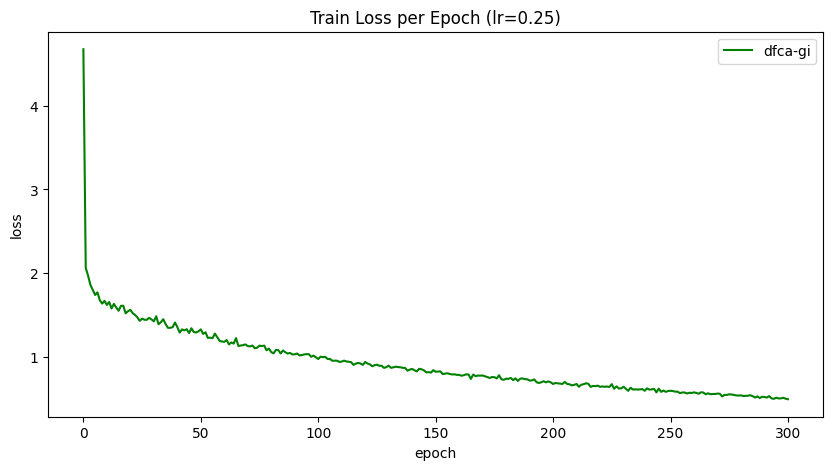

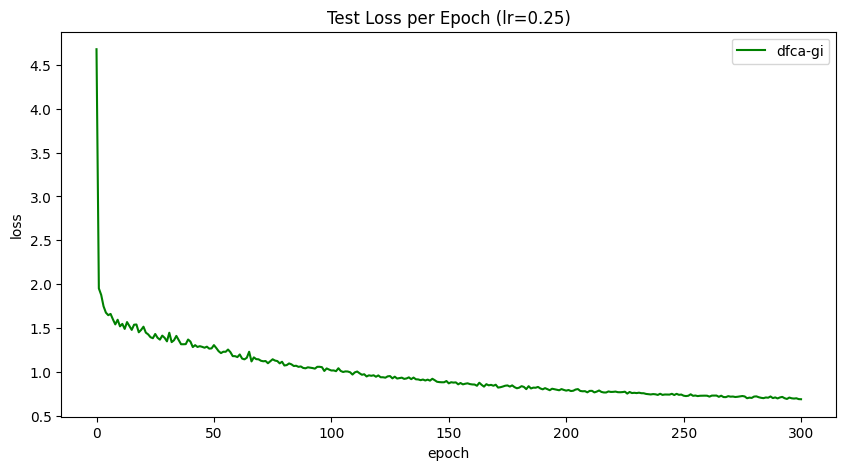

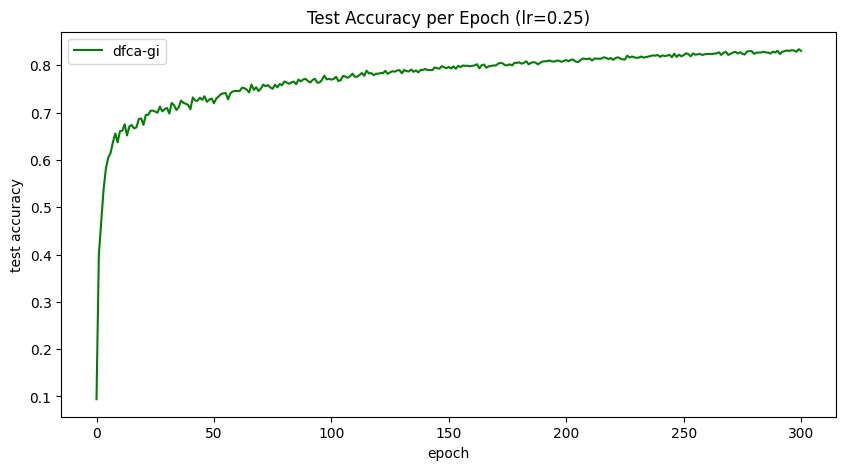

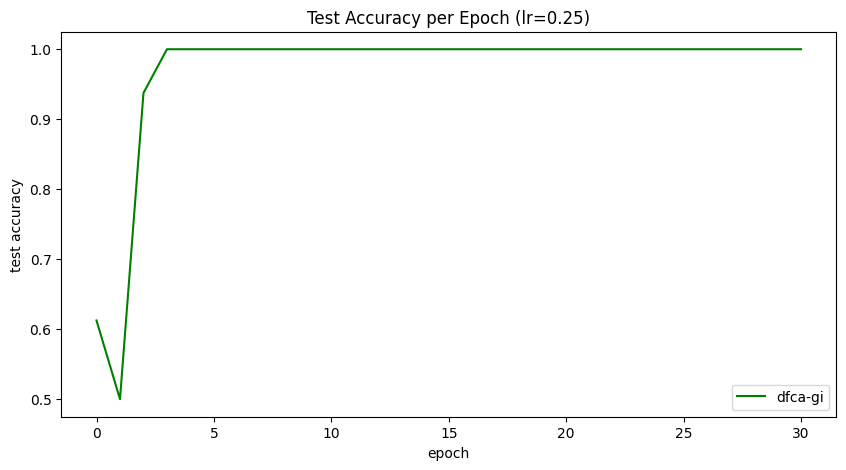

In [4]:

r_dfca_gi = {}

r_dfca_gi['test_loss'] = []
r_dfca_gi['test_acc'] = []
r_dfca_gi['cl_acc'] = []
r_dfca_gi['train_loss'] = []
for i in range(len(learning_rates)):
    r_dfca_gi['test_loss'].append(dfca_gi[i][0])
    r_dfca_gi['test_acc'].append(dfca_gi[i][1])
    r_dfca_gi['cl_acc'].append(dfca_gi[i][2])
    r_dfca_gi['train_loss'].append(dfca_gi[i][3])

with open('res_dfca.pickle', 'wb') as f:
    pickle.dump(r_dfca_gi, f)

os.makedirs('graphs', exist_ok=True)

for l in range(len(learning_rates)):

    plt.figure(figsize=(10,5))
    plt.plot(r_dfca_gi['train_loss'][l], label='dfca-gi', color='green')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.title(f'Train Loss per Epoch (lr={learning_rates[l]})')
    plt.legend()
    plt.savefig(os.path.join('graphs', '3_train_loss.png'))

    plt.figure(figsize=(10,5))
    plt.plot(r_dfca_gi['test_loss'][l], label='dfca-gi', color='green')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.title(f'Test Loss per Epoch (lr={learning_rates[l]})')
    plt.legend()
    plt.savefig(os.path.join('graphs', '3_test_loss.png'))

    plt.figure(figsize=(10,5))
    plt.plot(r_dfca_gi['test_acc'][l], label='dfca-gi', color='green')
    plt.xlabel('epoch')
    plt.ylabel('test accuracy')
    plt.title(f'Test Accuracy per Epoch (lr={learning_rates[l]})')
    plt.legend()
    plt.savefig(os.path.join('graphs', '3_test_acc.png'))

    plt.figure(figsize=(10,5))
    plt.plot(r_dfca_gi['cl_acc'][l][:31], label='dfca-gi', color='green')
    plt.xlabel('epoch')
    plt.ylabel('test accuracy')
    plt.title(f'Test Accuracy per Epoch (lr={learning_rates[l]})')
    plt.legend()
    plt.savefig(os.path.join('graphs', '3_test_acc.png'))

